# 🔥 AI-Based Forest Fire Smoke Detection
## Comprehensive Data Science Capstone Project

**Project Type:** Computer Vision & Disaster Response  
**Technologies:** Python, Scikit-learn, XGBoost, SHAP, LIME, SMOTE  
**Domain:** Environmental Monitoring & Emergency Response

---

### 📋 Table of Contents
1. [Project Overview & Setup](#1-project-overview--setup)
2. [Data Loading & Quality Assurance](#2-data-loading--quality-assurance)
3. [Exploratory Data Analysis (EDA)](#3-exploratory-data-analysis-eda)
4. [Statistical Analysis & Hypothesis Testing](#4-statistical-analysis--hypothesis-testing)
5. [Feature Analysis & Correlation Study](#5-feature-analysis--correlation-study)
6. [Feature Engineering](#6-feature-engineering)
7. [Feature Selection](#7-feature-selection)
8. [Model Development](#8-model-development)
9. [Hyperparameter Tuning](#9-hyperparameter-tuning)
10. [Model Interpretability - SHAP & LIME](#10-model-interpretability---shap--lime)
11. [Spatial Risk Analysis](#11-spatial-risk-analysis)
12. [Drone Deployment Optimization](#12-drone-deployment-optimization)
13. [Results & Conclusions](#13-results--conclusions)


---

## 1. Project Overview & Setup

### Project Objectives
- ✅ Understand visual indicators of fire and smoke in aerial imagery
- ✅ Apply supervised machine learning for disaster detection
- ✅ Evaluate model reliability using precision, recall, F1-score, and ROC-AUC
- ✅ Perform spatial aggregation and generate fire-risk heatmaps
- ✅ Interpret AI outputs for drone-based emergency response

### System Architecture

The pipeline is divided into five key stages:

1. **Data Ingestion & Statistical Validation**
2. **Feature Engineering & Selection**
3. **Dual-Track Modeling (Anomaly vs. Classification)**
4. **Spatial Risk Analysis**
5. **Operational Strategy (Drone Deployment)**


In [21]:
# Standard library imports
import os
import warnings
import sys
from datetime import datetime
from typing import Dict, List, Tuple, Any, Optional
import json

# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Statistical analysis
from scipy import stats
from scipy.stats import (shapiro, normaltest, anderson, kstest, 
                         ttest_ind, mannwhitneyu, chi2_contingency, 
                         pearsonr, spearmanr, kendalltau, f_oneway, 
                         levene, bartlett, probplot)
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.diagnostic import het_breuschpagan, acorr_ljungbox
from statsmodels.stats.stattools import durbin_watson

# Machine Learning - Preprocessing
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, 
                                   LabelEncoder, PolynomialFeatures, QuantileTransformer)
from sklearn.model_selection import (train_test_split, cross_val_score, 
                                     StratifiedKFold, GridSearchCV, 
                                     RandomizedSearchCV, learning_curve, 
                                     validation_curve, cross_validate)
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

# Feature Selection
from sklearn.feature_selection import (SelectKBest, f_classif, mutual_info_classif, 
                                       RFE, SelectFromModel, RFECV, chi2)

# Machine Learning - Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              AdaBoostClassifier, ExtraTreesClassifier, 
                              VotingClassifier, StackingClassifier, BaggingClassifier,
                              HistGradientBoostingClassifier)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.mixture import GaussianMixture
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor

# Metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, roc_curve, precision_recall_curve, 
                            confusion_matrix, classification_report, 
                            average_precision_score, matthews_corrcoef, 
                            cohen_kappa_score, log_loss, brier_score_loss, 
                            ConfusionMatrixDisplay, RocCurveDisplay, 
                            PrecisionRecallDisplay, balanced_accuracy_score,
                            jaccard_score, hinge_loss)

# Imbalanced Learning
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE, SVMSMOTE, SMOTENC
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, NearMiss
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score

# XGBoost
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
except ImportError:
    XGBOOST_AVAILABLE = False
    print("XGBoost not available. Install with: pip install xgboost")

# LightGBM
try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
except ImportError:
    LIGHTGBM_AVAILABLE = False

# CatBoost
try:
    import catboost as cb
    CATBOOST_AVAILABLE = True
except ImportError:
    CATBOOST_AVAILABLE = False

# Interpretability
try:
    import shap
    SHAP_AVAILABLE = True
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP not available. Install with: pip install shap")

try:
    import lime
    from lime.lime_tabular import LimeTabularExplainer
    LIME_AVAILABLE = True
except ImportError:
    LIME_AVAILABLE = False
    print("LIME not available. Install with: pip install lime")

# Clustering for drone deployment
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, SpectralClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Dimensionality Reduction
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
from sklearn.manifold import TSNE, Isomap, MDS

# Calibration
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', '{:.4f}'.format)

# Plotting style
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except Exception:
    try:
        plt.style.use('seaborn-whitegrid')
    except Exception:
        pass
sns.set_palette("husl")

# Random seed for reproducibility
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Create output directory for plots
OUTPUT_DIR = 'output_plots'
os.makedirs(OUTPUT_DIR, exist_ok=True)

print("="*80)
print("🔥 AI-BASED FOREST FIRE SMOKE DETECTION")
print("="*80)
print("✅ Environment setup complete!")
print(f"📅 Execution time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print(f"\n📦 Available packages:")
print(f"  • XGBoost: {XGBOOST_AVAILABLE}")
print(f"  • LightGBM: {LIGHTGBM_AVAILABLE}")
print(f"  • CatBoost: {CATBOOST_AVAILABLE}")
print(f"  • SHAP: {SHAP_AVAILABLE}")
print(f"  • LIME: {LIME_AVAILABLE}")
print("="*80)

🔥 AI-BASED FOREST FIRE SMOKE DETECTION
✅ Environment setup complete!
📅 Execution time: 2026-02-01 16:00:19

📦 Available packages:
  • XGBoost: True
  • LightGBM: False
  • CatBoost: False
  • SHAP: True
  • LIME: True


## 2. Data Loading & Quality Assurance

This section loads the dataset and performs comprehensive data quality checks.

In [17]:
print("\n" + "="*80)
print("📊 CELL 2: DATA LOADING & QUALITY ASSURANCE")
print("="*80)

# Load the dataset
data_path = r'D:\VSCODE\AI Based Forest Fire Smoke Detection Capstone\Forest Fire Smoke Dataset.xlsx'
try:
    df = pd.read_excel(data_path)
    print(f"\n📁 Dataset loaded from: {data_path}")
except FileNotFoundError:
    print(f"⚠️ Dataset not found at {data_path}. Creating synthetic demo dataset.")
    n = 1000
    rng = np.random.RandomState(RANDOM_STATE)
    df = pd.DataFrame({
        'mean_red': rng.normal(120, 30, n).clip(0, 255),
        'mean_green': rng.normal(100, 25, n).clip(0, 255),
        'mean_blue': rng.normal(90, 20, n).clip(0, 255),
        'red_blue_ratio': rng.normal(1.2, 0.5, n),
        'intensity_std': rng.exponential(10, n),
        'edge_density': rng.uniform(0, 1, n),
        'smoke_whiteness': rng.uniform(0, 1, n),
        'haze_index': rng.uniform(0, 1, n),
        'hot_pixel_fraction': rng.beta(2, 20, n),
        'local_contrast': rng.uniform(0, 1, n),
        'fire_label': rng.binomial(1, 0.25, n)
    })

# Basic information
print(f"📏 Shape: {df.shape[0]} rows × {df.shape[1]} columns")

# Column information
print(f"\n📋 Columns:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Data types
print(f"\n🔤 Data Types:")
print(df.dtypes)

# Missing values analysis
print(f"\n❓ Missing Values Analysis:")
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})
print(missing_df)

# Duplicate analysis
print(f"\n🔄 Duplicate Analysis:")
duplicates = df.duplicated().sum()
print(f"  • Exact duplicates: {duplicates}")
print(f"  • Duplicate percentage: {duplicates/len(df)*100:.4f}%")

# Memory usage
print(f"\n💾 Memory Usage:")
print(f"  • Total: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Class distribution
print(f"\n📊 Class Distribution:")
if 'fire_label' not in df.columns:
    raise KeyError('fire_label column missing from dataset')
class_dist = df['fire_label'].value_counts().sort_index()
class_pct = df['fire_label'].value_counts(normalize=True).sort_index() * 100
class_df = pd.DataFrame({
    'Count': class_dist,
    'Percentage': class_pct
})
print(class_df)

# Imbalance ratio
if class_dist.min() == 0:
    imbalance_ratio = float('inf')
else:
    imbalance_ratio = class_dist.max() / class_dist.min()
print(f"\n⚖️ Imbalance Ratio: {imbalance_ratio:.2f}:1")

# First few rows
print(f"\n🔍 First 5 rows:")
print(df.head())

# Statistical summary
print(f"\n📈 Statistical Summary:")
print(df.describe())

# Separate features and target
feature_cols = [col for col in df.columns if col != 'fire_label']
X = df[feature_cols].copy()
y = df['fire_label'].copy()

print(f"\n✅ Features (X): {X.shape}")
print(f"✅ Target (y): {y.shape}")

# Data Quality Score
print(f"\n📊 Data Quality Score:")
dq_score = 100
if duplicates > 0:
    dq_score -= 10
if missing.sum() > 0:
    dq_score -= 20
print(f"  • Score: {dq_score}/100")
print(f"  • Status: {'✅ Excellent' if dq_score >= 90 else '⚠️ Good' if dq_score >= 70 else '❌ Needs attention'}")


📊 CELL 2: DATA LOADING & QUALITY ASSURANCE

📁 Dataset loaded from: D:\VSCODE\AI Based Forest Fire Smoke Detection Capstone\Forest Fire Smoke Dataset.xlsx
📏 Shape: 3000 rows × 11 columns

📋 Columns:
   1. mean_red
   2. mean_green
   3. mean_blue
   4. red_blue_ratio
   5. intensity_std
   6. edge_density
   7. smoke_whiteness
   8. haze_index
   9. hot_pixel_fraction
  10. local_contrast
  11. fire_label

🔤 Data Types:
mean_red              float64
mean_green            float64
mean_blue             float64
red_blue_ratio        float64
intensity_std         float64
edge_density          float64
smoke_whiteness       float64
haze_index            float64
hot_pixel_fraction    float64
local_contrast        float64
fire_label              int64
dtype: object

❓ Missing Values Analysis:
                    Missing Count  Missing %
mean_red                        0     0.0000
mean_green                      0     0.0000
mean_blue                       0     0.0000
red_blue_ratio          

## 3. Exploratory Data Analysis (EDA) - Univariate Analysis

Comprehensive univariate analysis including distributions, box plots, and normality tests.


📊 CELL 3: EXPLORATORY DATA ANALYSIS - UNIVARIATE ANALYSIS


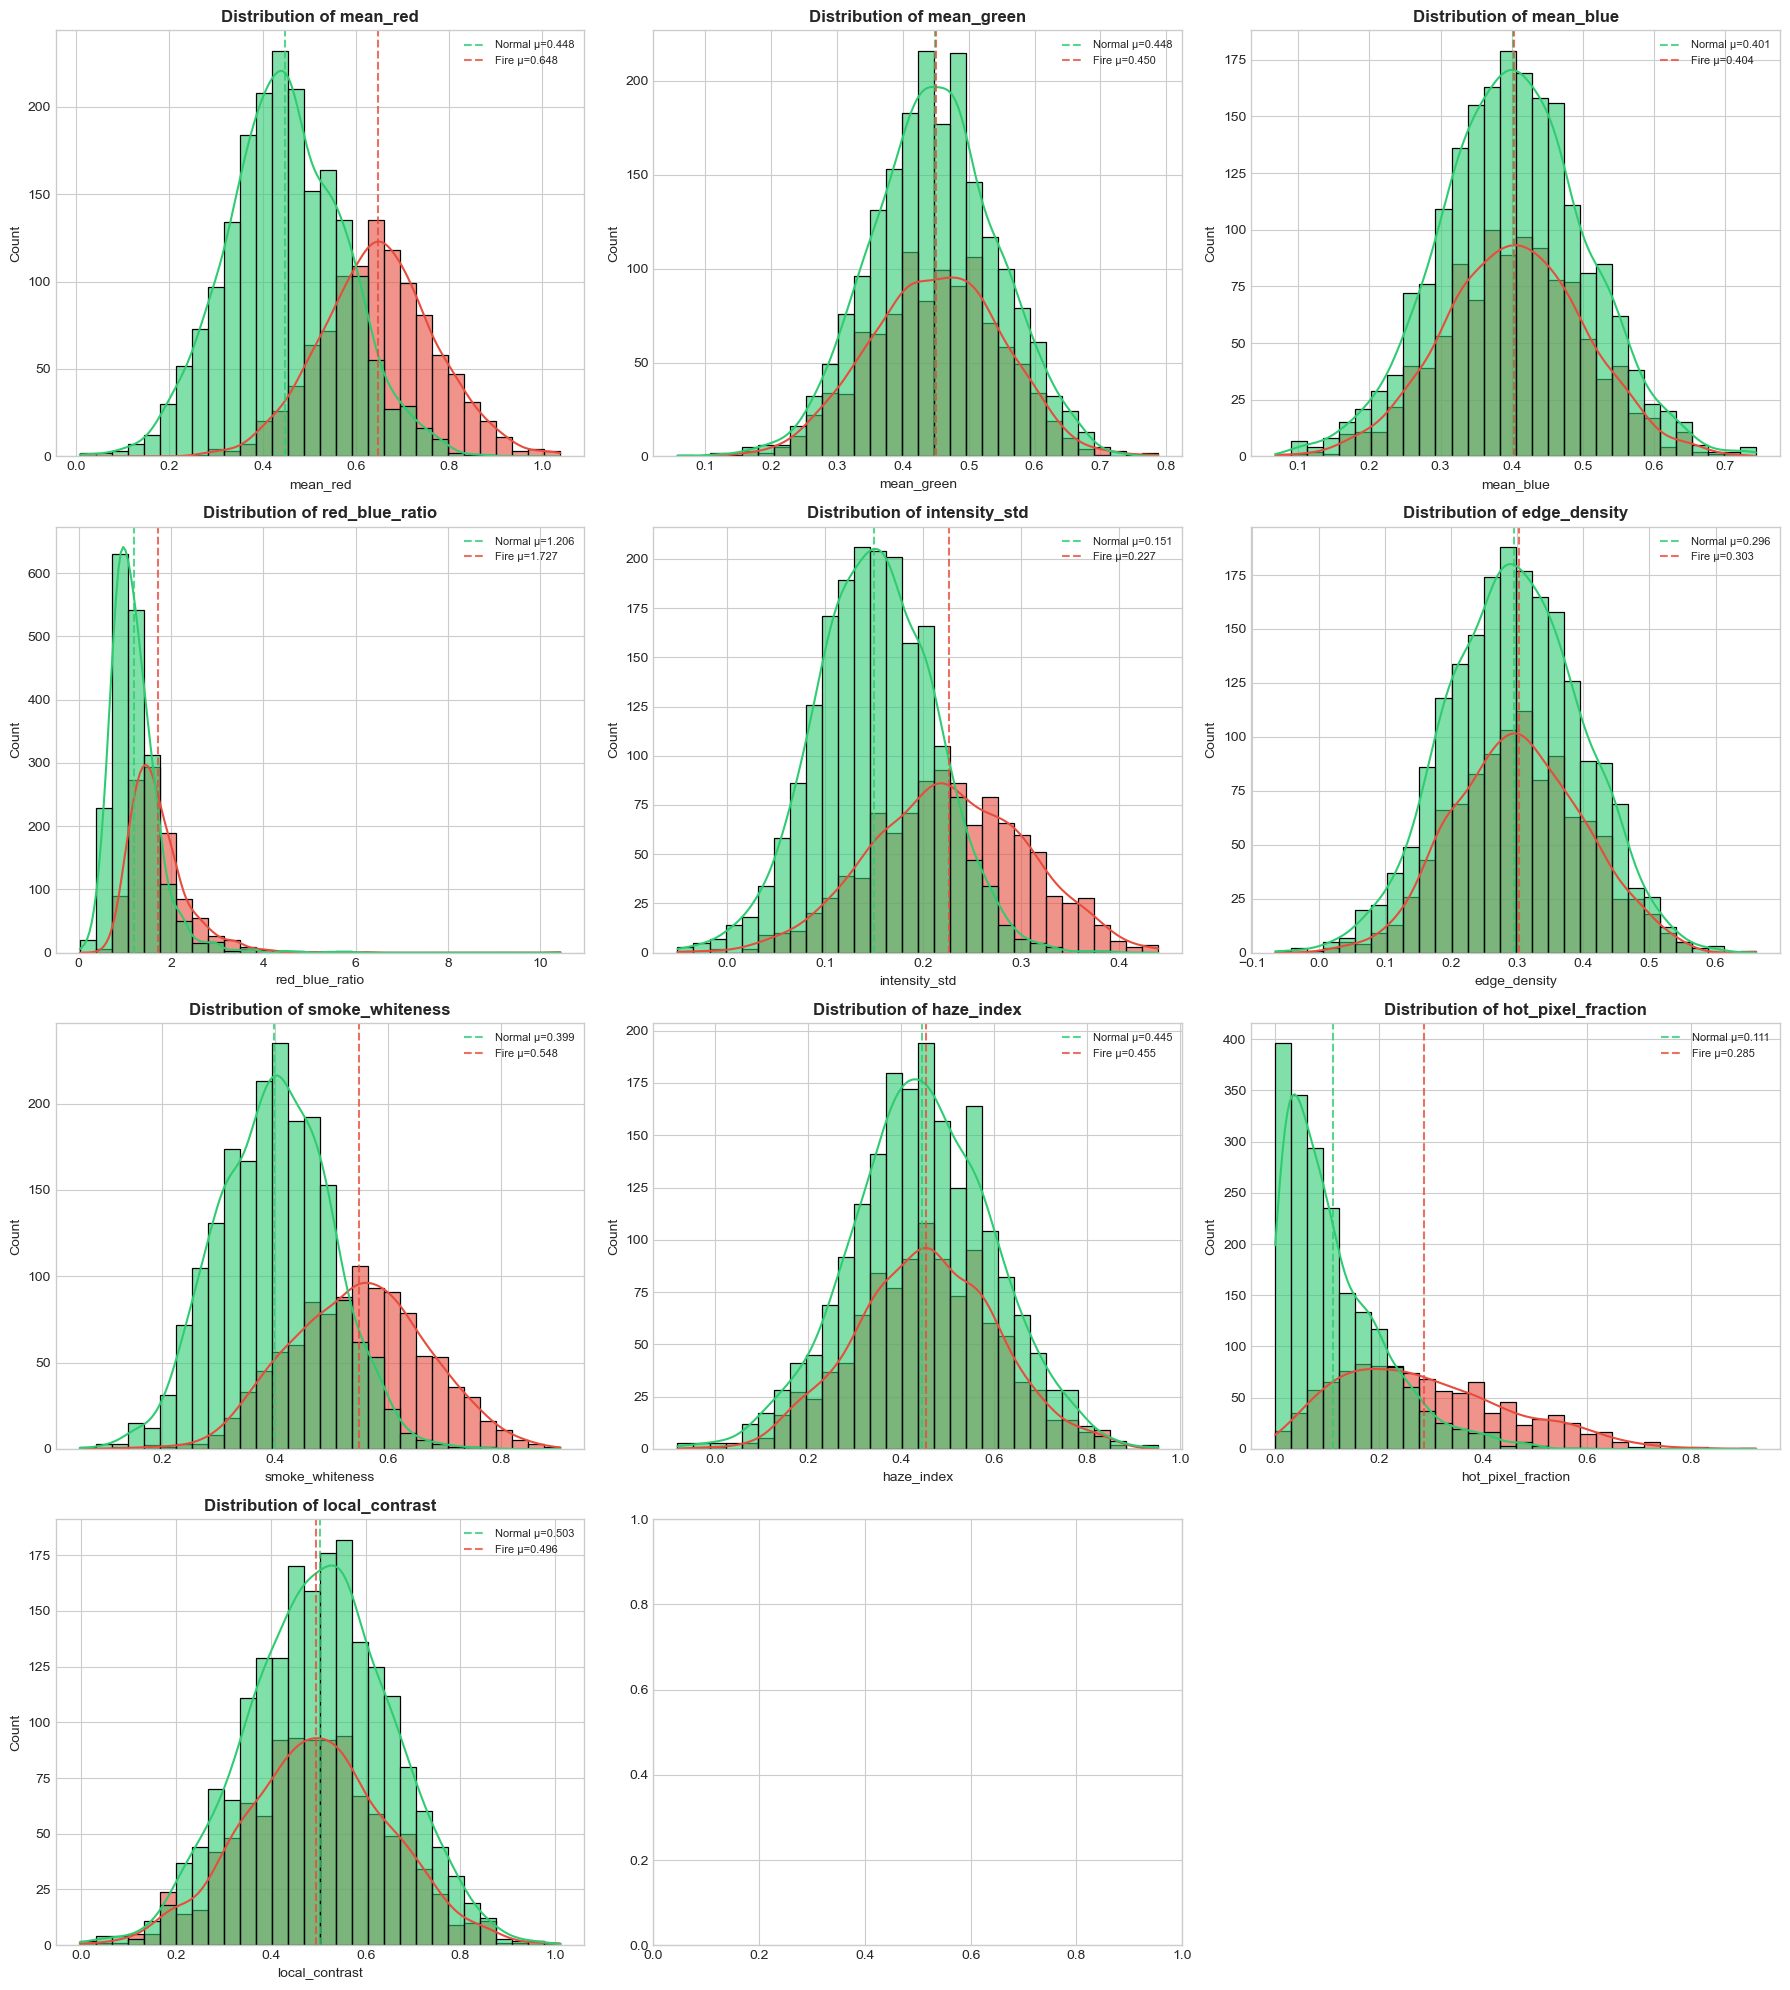

✅ Saved: output_plots/01_univariate_distributions.png


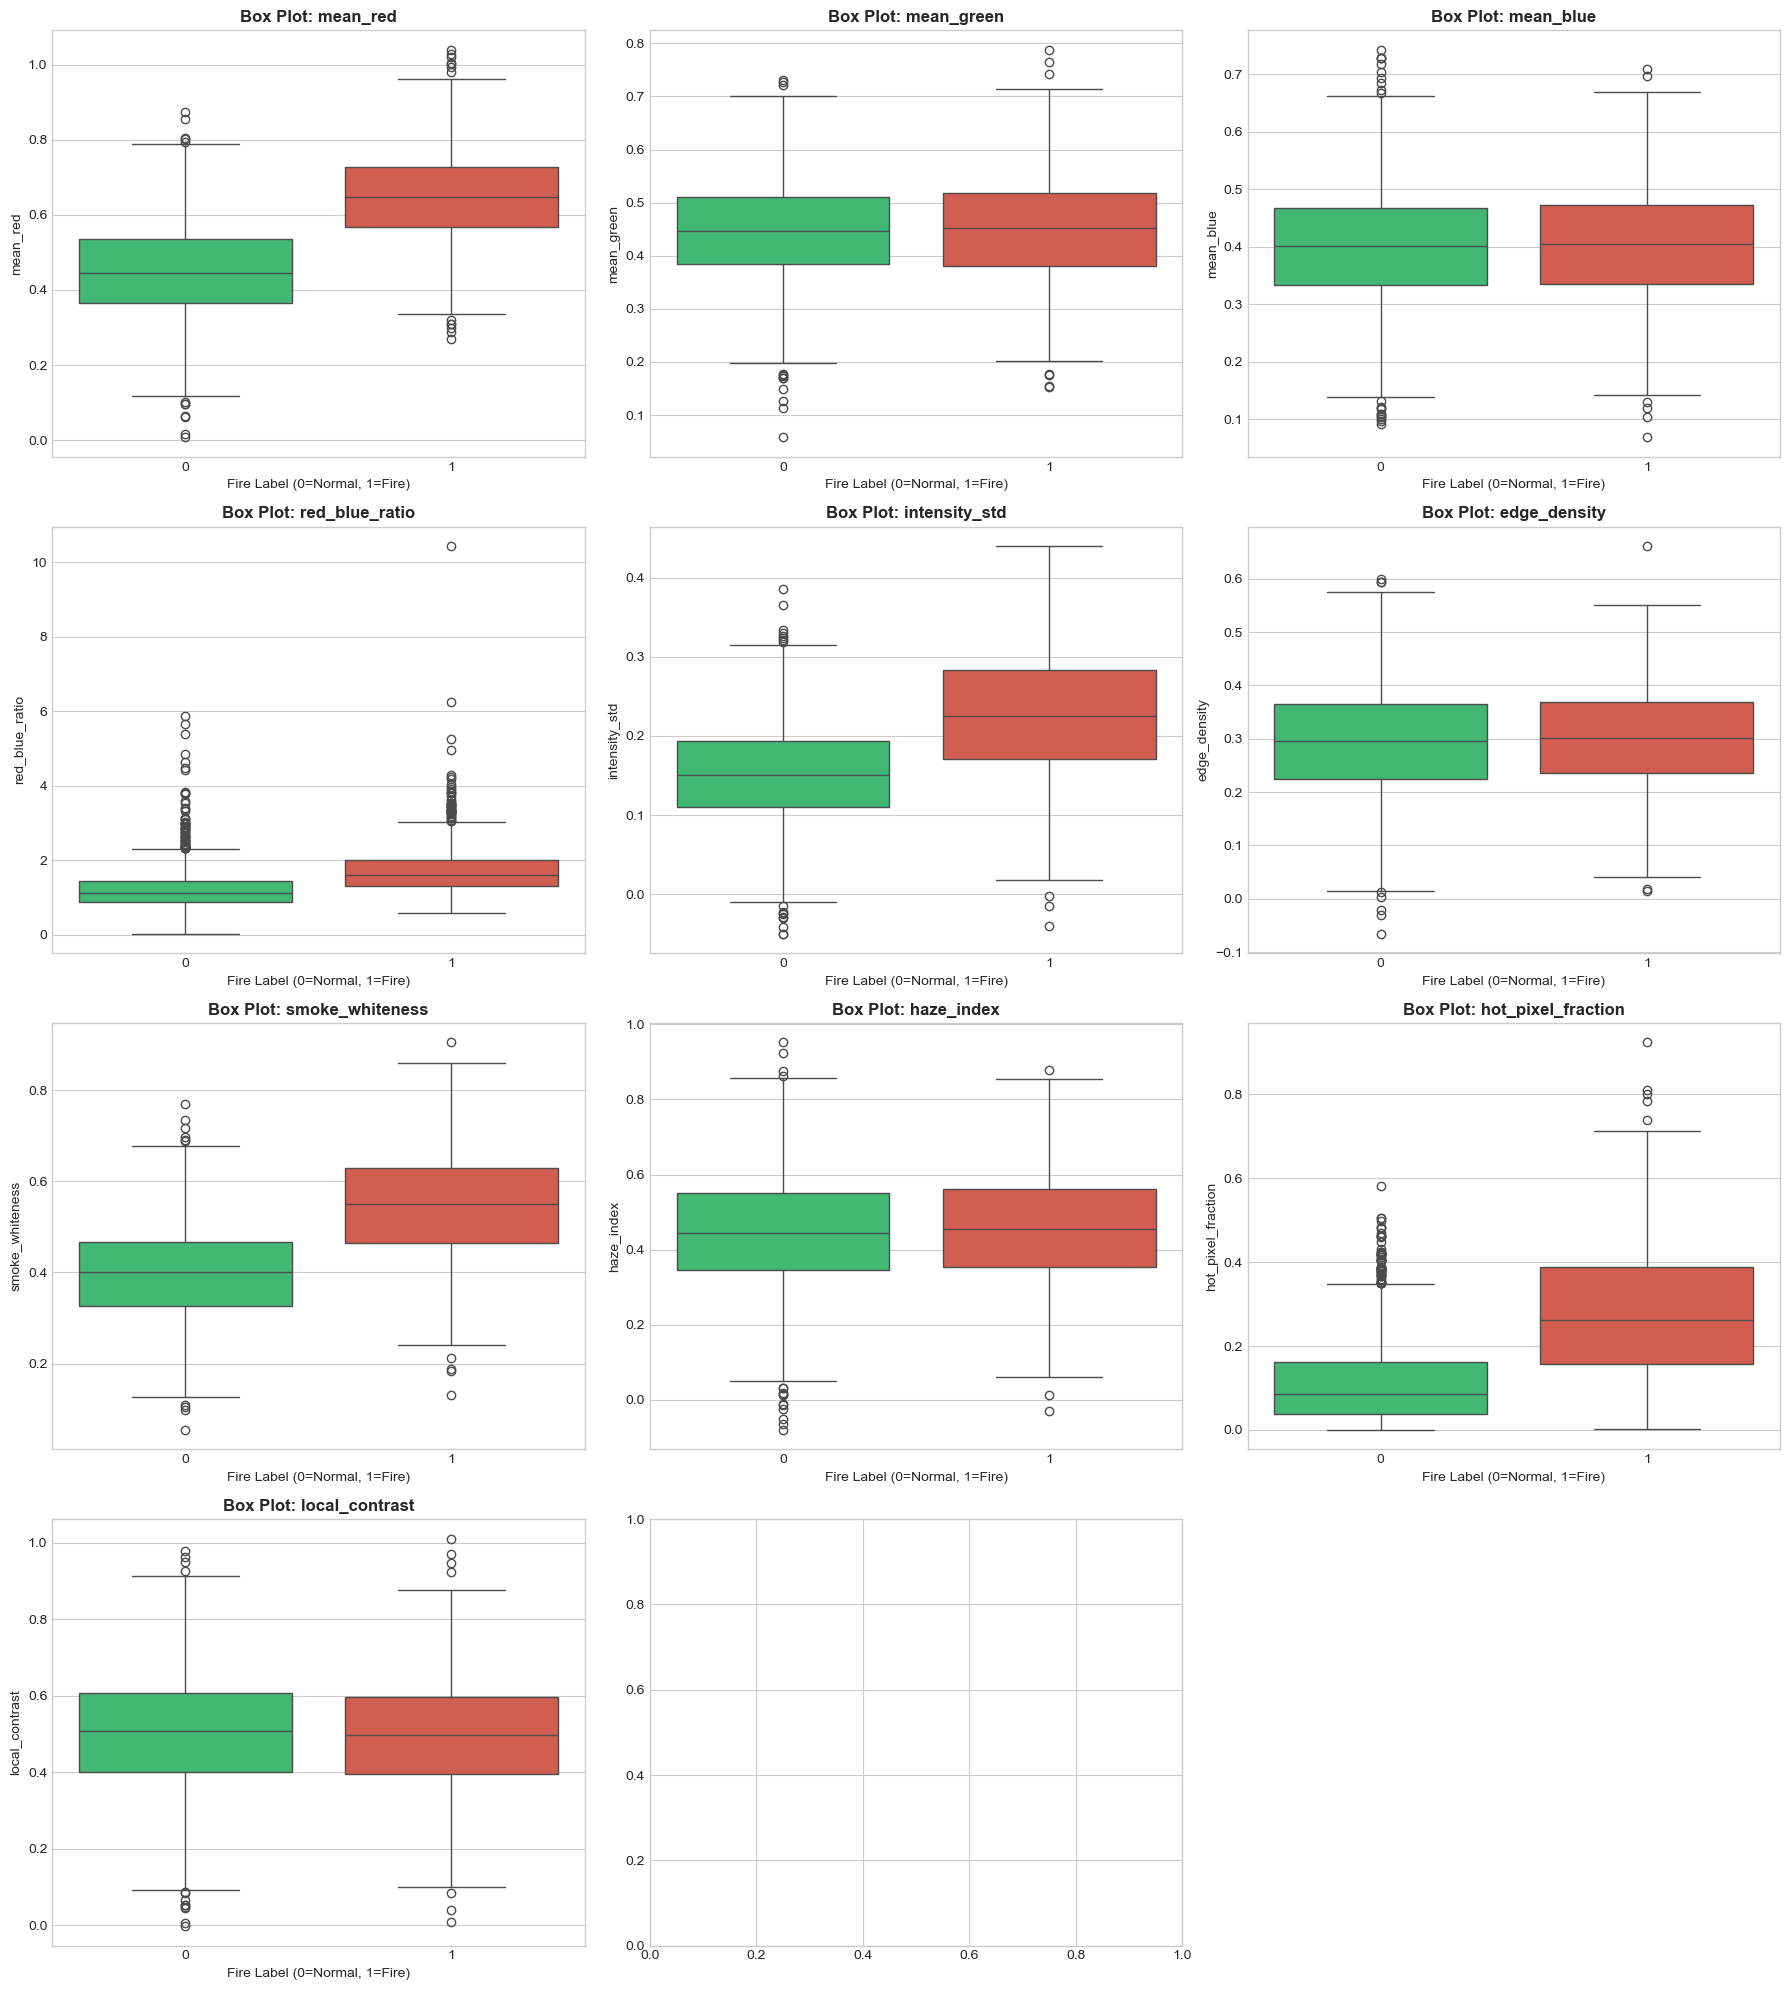

✅ Saved: output_plots/02_boxplots_outliers.png

📊 Normality Tests (Shapiro-Wilk):
  • mean_red            : W=0.9976, p=1.26e-04 - ❌ Non-normal
  • mean_green          : W=0.9996, p=7.63e-01 - ✅ Normal
  • mean_blue           : W=0.9995, p=6.27e-01 - ✅ Normal
  • red_blue_ratio      : W=0.8601, p=1.10e-45 - ❌ Non-normal
  • intensity_std       : W=0.9923, p=1.53e-11 - ❌ Non-normal
  • edge_density        : W=0.9993, p=2.74e-01 - ✅ Normal
  • smoke_whiteness     : W=0.9930, p=7.37e-11 - ❌ Non-normal
  • haze_index          : W=0.9994, p=5.53e-01 - ✅ Normal
  • hot_pixel_fraction  : W=0.8870, p=2.33e-42 - ❌ Non-normal
  • local_contrast      : W=0.9995, p=7.04e-01 - ✅ Normal

📊 Skewness and Kurtosis:
  • mean_red            : Skew=  0.137, Kurt= -0.210
  • mean_green          : Skew= -0.052, Kurt= -0.026
  • mean_blue           : Skew=  0.014, Kurt=  0.060
  • red_blue_ratio      : Skew=  2.469, Kurt= 17.846
  • intensity_std       : Skew=  0.334, Kurt=  0.119
  • edge_density        : S

In [18]:
print("\n" + "="*80)
print("📊 CELL 3: EXPLORATORY DATA ANALYSIS - UNIVARIATE ANALYSIS")
print("="*80)

# Create comprehensive univariate analysis
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    ax = axes[idx]
    
    # Histogram with KDE
    sns.histplot(data=df, x=col, hue='fire_label', kde=True, bins=30, 
                 alpha=0.6, ax=ax, palette=['#2ecc71', '#e74c3c'])
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')
    
    # Add statistics text
    mean_normal = df[df['fire_label'] == 0][col].mean()
    mean_fire = df[df['fire_label'] == 1][col].mean()
    ax.axvline(mean_normal, color='#2ecc71', linestyle='--', alpha=0.8, label=f'Normal μ={mean_normal:.3f}')
    ax.axvline(mean_fire, color='#e74c3c', linestyle='--', alpha=0.8, label=f'Fire μ={mean_fire:.3f}')
    ax.legend(fontsize=8)

# Remove empty subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/01_univariate_distributions.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/01_univariate_distributions.png")

# Box plots for outlier detection
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    ax = axes[idx]
    sns.boxplot(data=df, x='fire_label', y=col, ax=ax, palette=['#2ecc71', '#e74c3c'])
    ax.set_title(f'Box Plot: {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Fire Label (0=Normal, 1=Fire)')
    ax.set_ylabel(col)

axes[-1].axis('off')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/02_boxplots_outliers.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/02_boxplots_outliers.png")

# Statistical tests for normality
print(f"\n📊 Normality Tests (Shapiro-Wilk):")
normality_results = []
for col in feature_cols:
    stat, p_value = shapiro(df[col].sample(min(5000, len(df))))
    is_normal = "✅ Normal" if p_value > 0.05 else "❌ Non-normal"
    normality_results.append({
        'Feature': col,
        'Statistic': stat,
        'p-value': p_value,
        'Result': is_normal
    })
    print(f"  • {col:20s}: W={stat:.4f}, p={p_value:.2e} - {is_normal}")

# Skewness and Kurtosis
print(f"\n📊 Skewness and Kurtosis:")
skew_kurt = []
for col in feature_cols:
    skew = df[col].skew()
    kurt = df[col].kurtosis()
    skew_kurt.append({
        'Feature': col,
        'Skewness': skew,
        'Kurtosis': kurt,
        'Skew Interpretation': 'Right-skewed' if skew > 0.5 else 'Left-skewed' if skew < -0.5 else 'Symmetric'
    })
    print(f"  • {col:20s}: Skew={skew:7.3f}, Kurt={kurt:7.3f}")

## 4. Statistical Analysis & Hypothesis Testing

Two-sample t-tests, Mann-Whitney U tests, and effect size calculations.


📊 CELL 4: STATISTICAL ANALYSIS & HYPOTHESIS TESTING

🔬 Two-Sample t-Tests (Normal vs Fire):
------------------------------------------------------------
  • mean_red            : t=-42.063, p=2.64e-304 ***, Cohen's d= 1.607 (Large)
  • mean_green          : t= -0.511, p=6.10e-01 ns, Cohen's d= 0.020 (Small)
  • mean_blue           : t= -0.567, p=5.71e-01 ns, Cohen's d= 0.022 (Small)
  • red_blue_ratio      : t=-21.432, p=6.07e-91 ***, Cohen's d= 0.874 (Large)
  • intensity_std       : t=-27.259, p=1.25e-136 ***, Cohen's d= 1.124 (Large)
  • edge_density        : t= -1.884, p=5.96e-02 ns, Cohen's d= 0.072 (Small)
  • smoke_whiteness     : t=-34.678, p=1.38e-203 ***, Cohen's d= 1.399 (Large)
  • haze_index          : t= -1.716, p=8.62e-02 ns, Cohen's d= 0.066 (Small)
  • hot_pixel_fraction  : t=-31.961, p=1.45e-170 ***, Cohen's d= 1.410 (Large)
  • local_contrast      : t=  1.207, p=2.28e-01 ns, Cohen's d=-0.046 (Small)

📊 Effect Size Summary:
           Feature  Difference_%  Cohens_d 

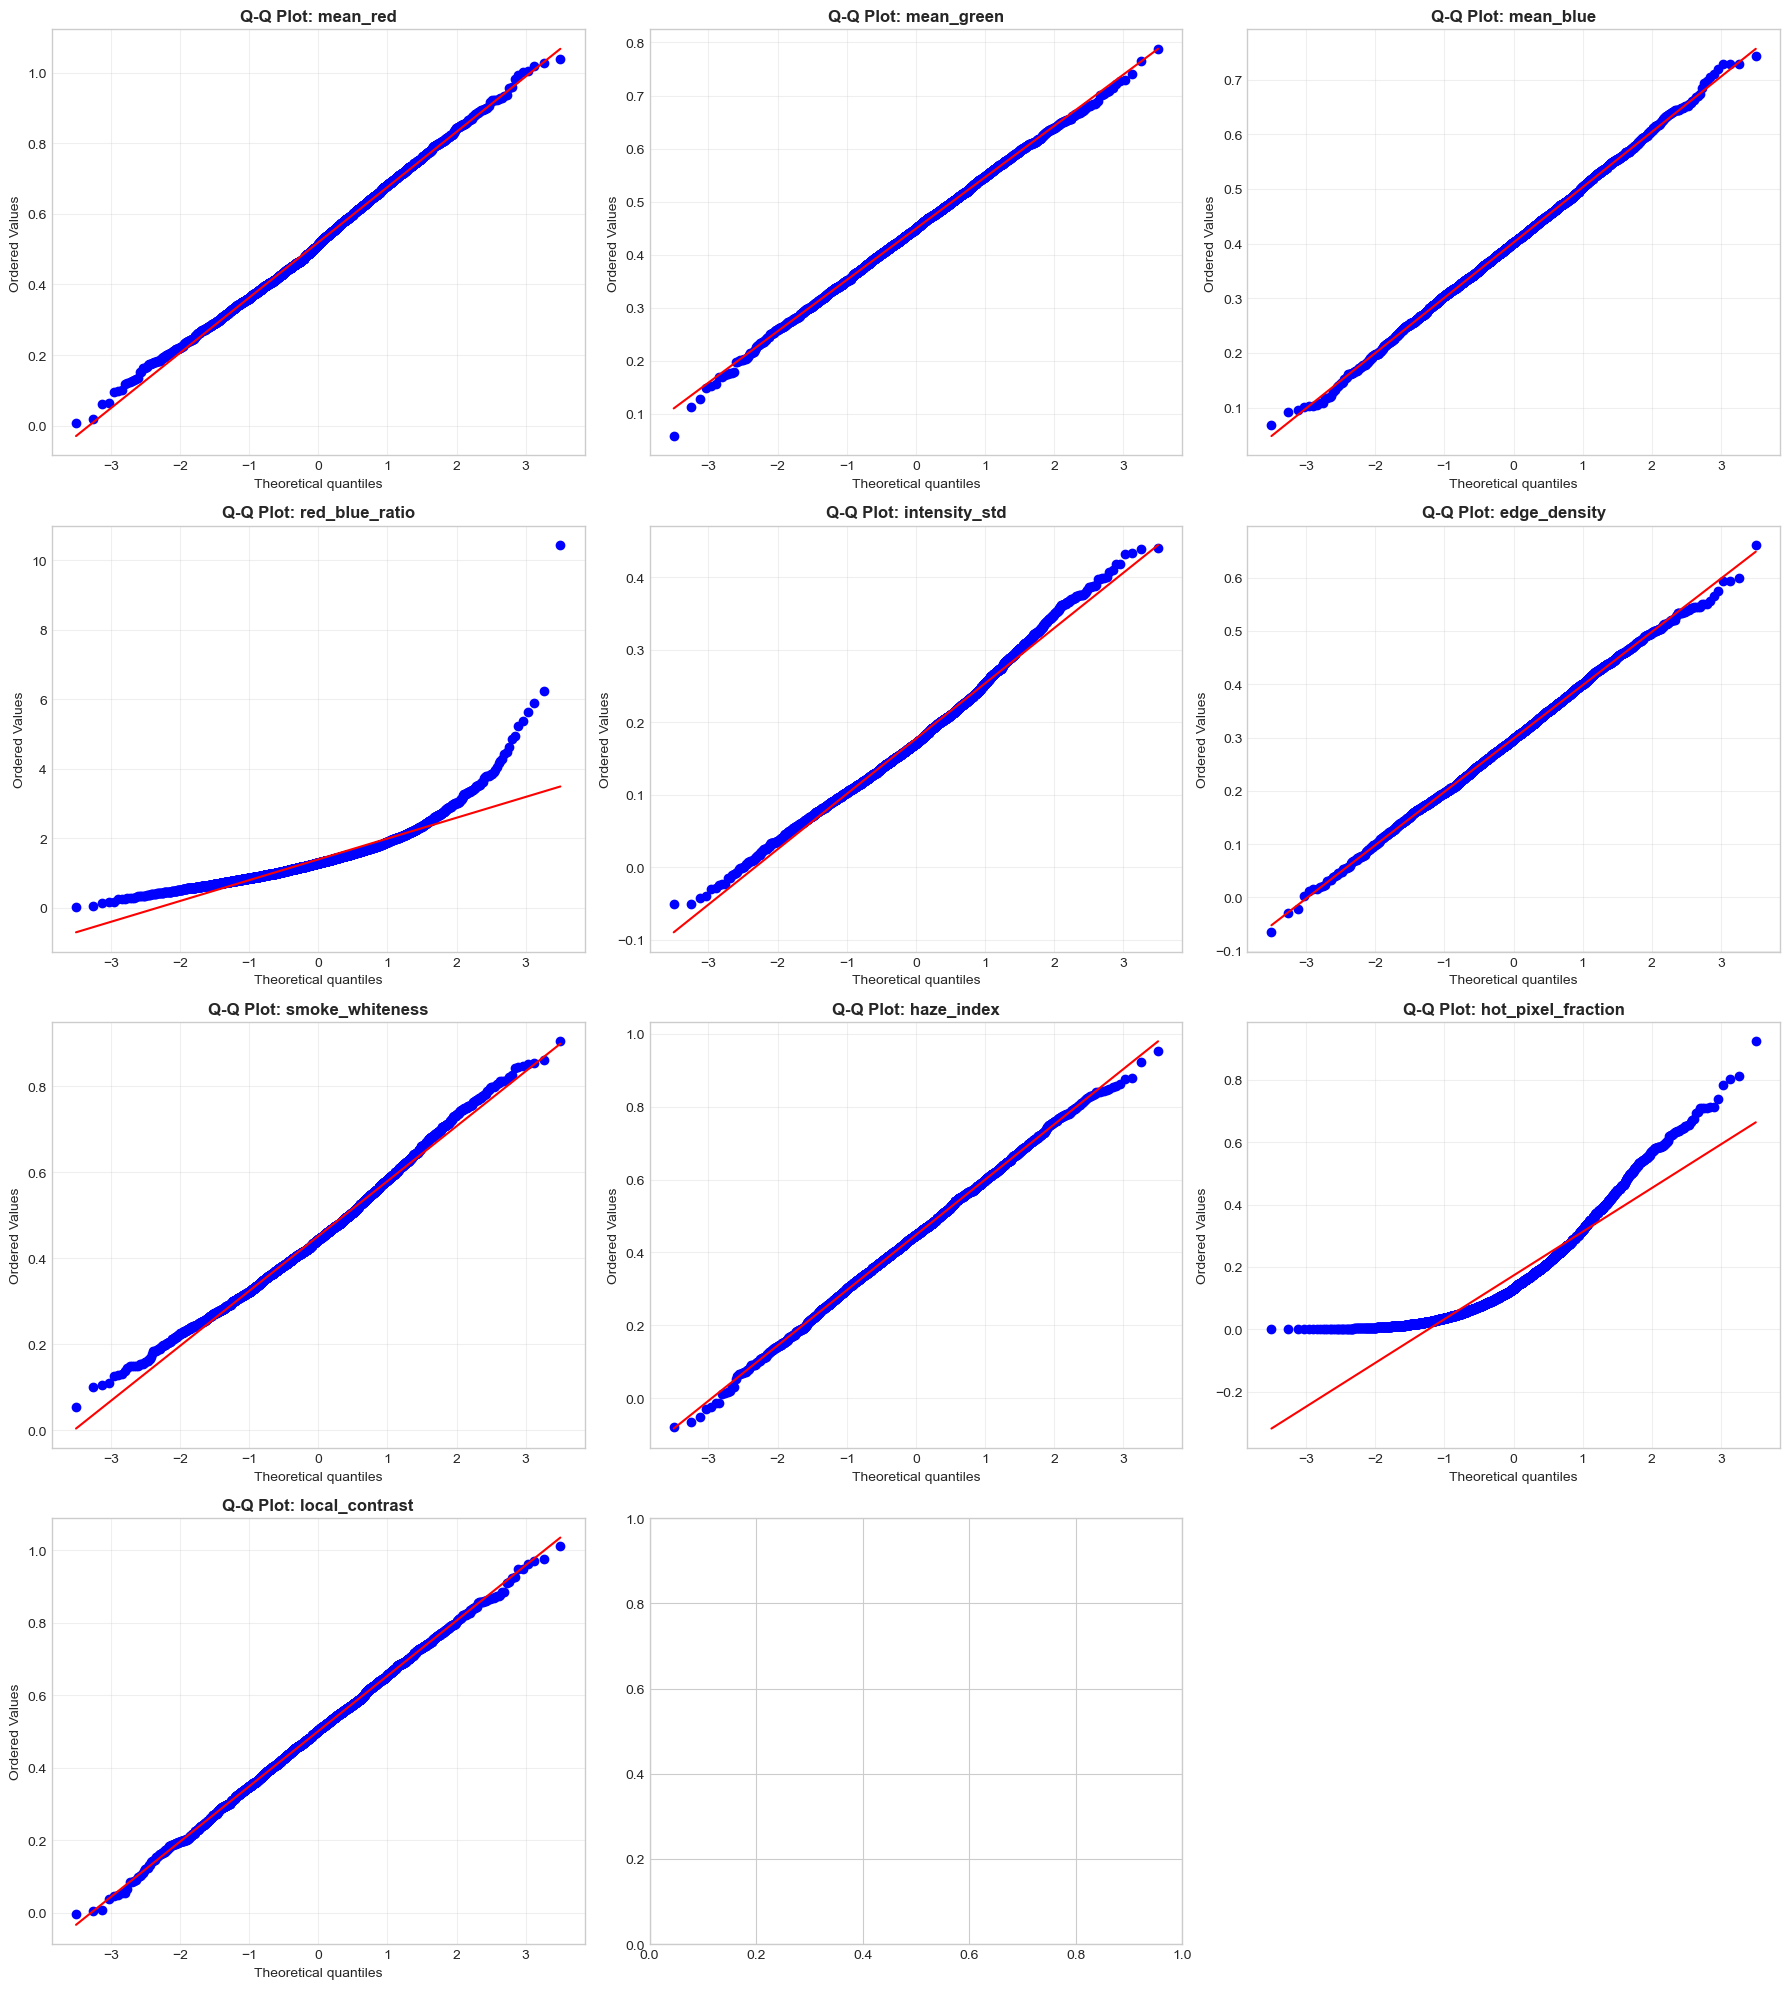

✅ Saved: output_plots/03_qq_plots.png


In [19]:
print("\n" + "="*80)
print("📊 CELL 4: STATISTICAL ANALYSIS & HYPOTHESIS TESTING")
print("="*80)

# Separate data by class
normal_data = df[df['fire_label'] == 0]
fire_data = df[df['fire_label'] == 1]

print(f"\n🔬 Two-Sample t-Tests (Normal vs Fire):")
print("-" * 60)
ttest_results = []

for col in feature_cols:
    # Levene's test for equal variances
    levene_stat, levene_p = levene(normal_data[col], fire_data[col])
    equal_var = levene_p > 0.05
    
    # t-test
    t_stat, t_p = ttest_ind(normal_data[col], fire_data[col], equal_var=equal_var)
    
    # Effect size (Cohen's d)
    pooled_std = np.sqrt(((len(normal_data)-1)*normal_data[col].var() + 
                          (len(fire_data)-1)*fire_data[col].var()) / 
                         (len(normal_data) + len(fire_data) - 2))
    cohens_d = (fire_data[col].mean() - normal_data[col].mean()) / pooled_std
    
    # Mann-Whitney U test (non-parametric)
    u_stat, u_p = mannwhitneyu(normal_data[col], fire_data[col], alternative='two-sided')
    
    ttest_results.append({
        'Feature': col,
        'Normal_Mean': normal_data[col].mean(),
        'Fire_Mean': fire_data[col].mean(),
        'Difference_%': ((fire_data[col].mean() - normal_data[col].mean()) / normal_data[col].mean()) * 100,
        't-statistic': t_stat,
        't-test_p': t_p,
        'MannWhitney_p': u_p,
        'Cohens_d': cohens_d,
        'Effect_Size': 'Large' if abs(cohens_d) > 0.8 else 'Medium' if abs(cohens_d) > 0.5 else 'Small'
    })
    
    significance = "***" if t_p < 0.001 else "**" if t_p < 0.01 else "*" if t_p < 0.05 else "ns"
    print(f"  • {col:20s}: t={t_stat:7.3f}, p={t_p:.2e} {significance}, Cohen's d={cohens_d:6.3f} ({ttest_results[-1]['Effect_Size']})")

ttest_df = pd.DataFrame(ttest_results)
print(f"\n📊 Effect Size Summary:")
print(ttest_df[['Feature', 'Difference_%', 'Cohens_d', 'Effect_Size']].to_string(index=False))

# Q-Q plots for normality assessment
fig, axes = plt.subplots(4, 3, figsize=(18, 20))
axes = axes.flatten()

for idx, col in enumerate(feature_cols):
    ax = axes[idx]
    probplot(df[col], dist="norm", plot=ax)
    ax.set_title(f'Q-Q Plot: {col}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)

axes[-1].axis('off')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/03_qq_plots.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/03_qq_plots.png")

## 5. Feature Analysis & Correlation Study

Correlation matrix, VIF analysis, and mutual information scores.


📊 CELL 5: FEATURE ANALYSIS & CORRELATION STUDY


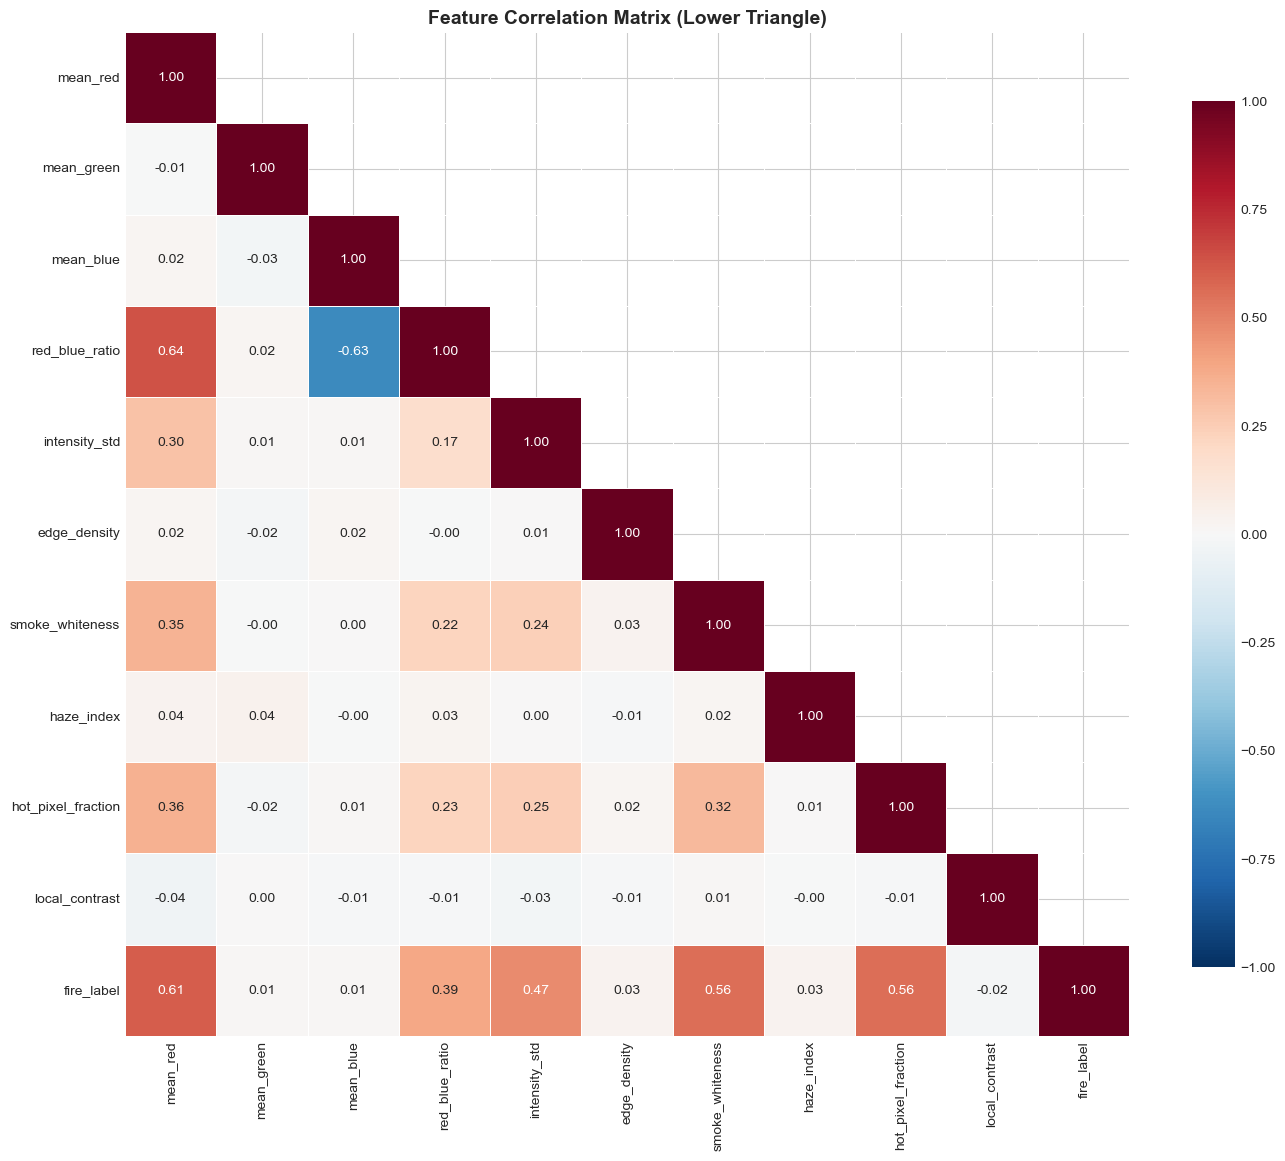

✅ Saved: output_plots/04_correlation_heatmap.png

📊 Correlation with Target (fire_label):
mean_red              0.6092
hot_pixel_fraction    0.5589
smoke_whiteness       0.5561
intensity_std         0.4734
red_blue_ratio        0.3857
edge_density          0.0344
haze_index            0.0313
local_contrast       -0.0220
mean_blue             0.0104
mean_green            0.0094
Name: fire_label, dtype: float64

📊 Highly Correlated Feature Pairs (|r| > 0.7):

📊 Variance Inflation Factor (VIF) Analysis:
--------------------------------------------------
VIF > 10: High multicollinearity
VIF > 5: Moderate multicollinearity
VIF < 5: Low multicollinearity
--------------------------------------------------
           Feature     VIF
          mean_red 39.4496
         mean_blue 31.9943
    red_blue_ratio 22.4197
        mean_green 18.7256
   smoke_whiteness 15.6251
    local_contrast 10.6980
      edge_density  9.2156
        haze_index  9.2031
     intensity_std  7.1896
hot_pixel_fraction  2.

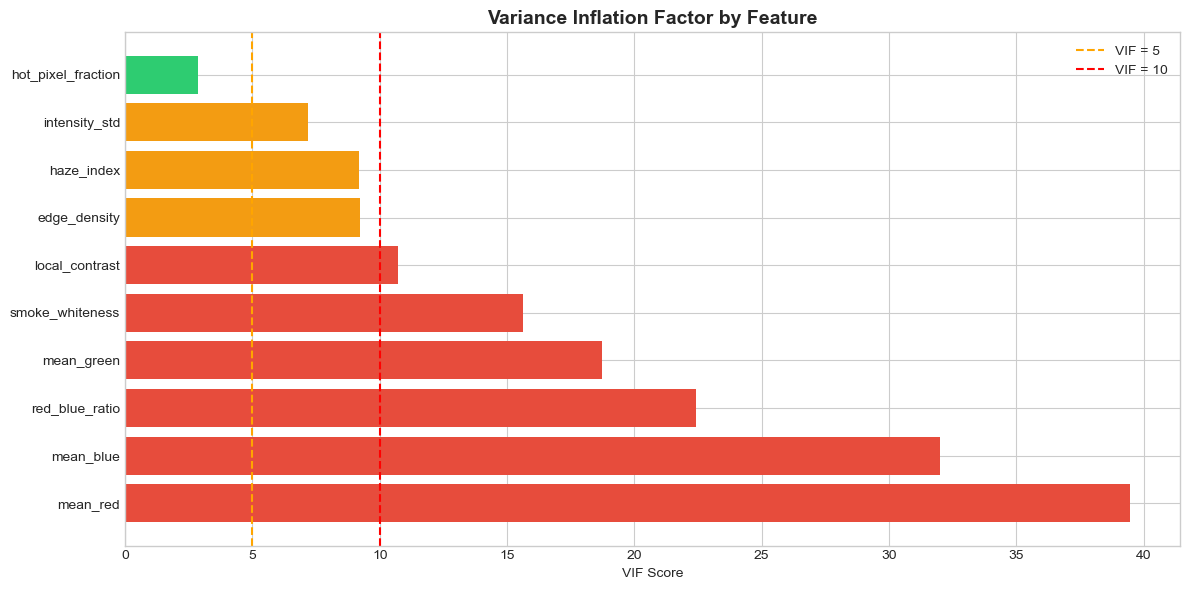

✅ Saved: output_plots/05_vif_analysis.png

📊 Mutual Information with Target:
           Feature  MI_Score
          mean_red    0.2196
hot_pixel_fraction    0.1810
   smoke_whiteness    0.1728
     intensity_std    0.1228
    red_blue_ratio    0.1076
      edge_density    0.0248
        mean_green    0.0121
         mean_blue    0.0000
        haze_index    0.0000
    local_contrast    0.0000


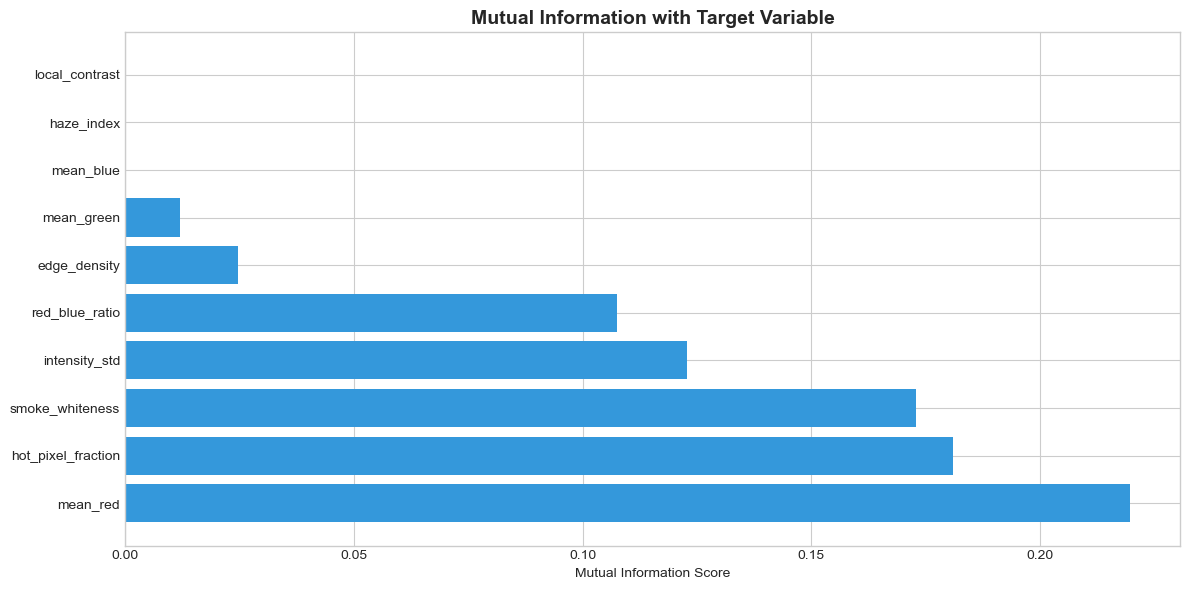

✅ Saved: output_plots/06_mutual_information.png


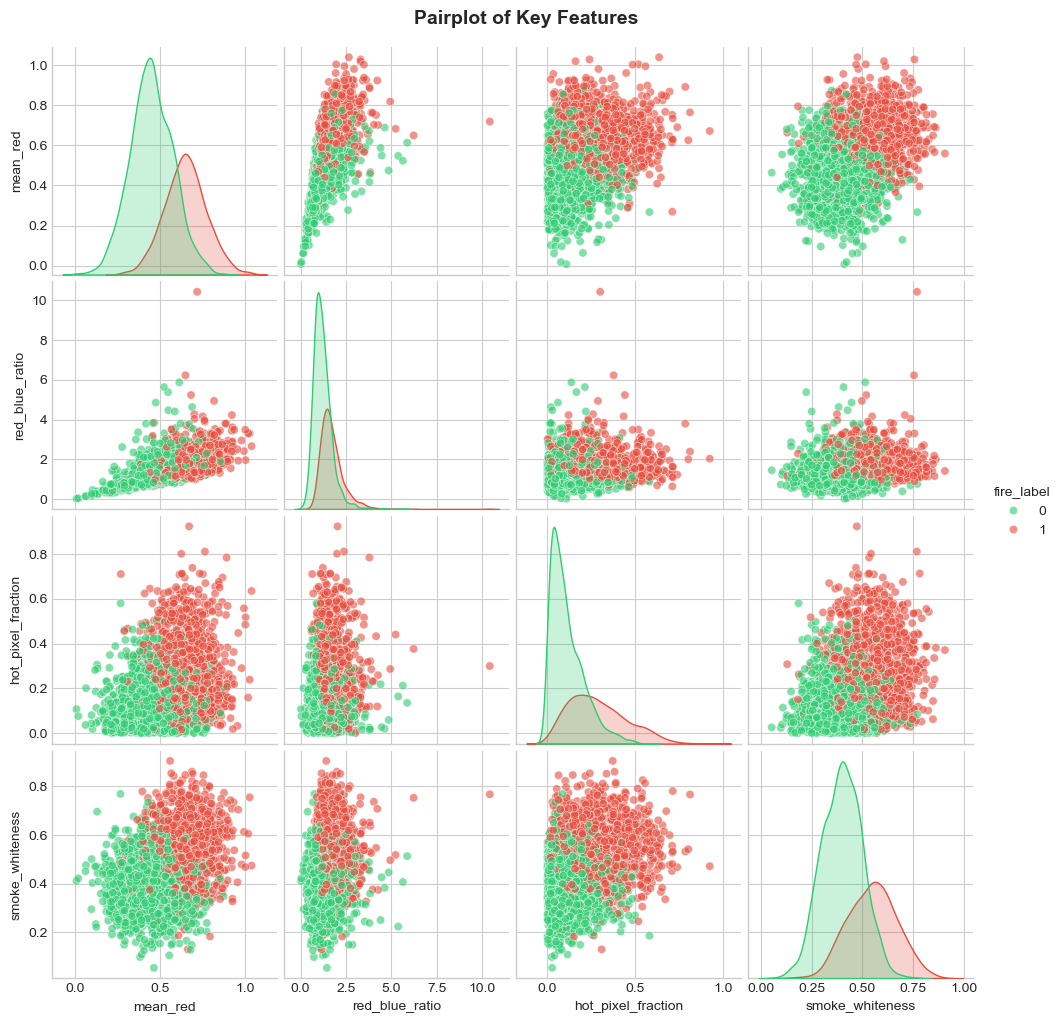

✅ Saved: output_plots/07_pairplot_key_features.png


In [20]:
print("\n" + "="*80)
print("📊 CELL 5: FEATURE ANALYSIS & CORRELATION STUDY")
print("="*80)

# Correlation matrix
corr_matrix = df.corr()

# Plot correlation heatmap
fig, ax = plt.subplots(figsize=(14, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='RdBu_r', 
            center=0, square=True, linewidths=0.5, 
            cbar_kws={"shrink": 0.8}, ax=ax,
            vmin=-1, vmax=1)
ax.set_title('Feature Correlation Matrix (Lower Triangle)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/04_correlation_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/04_correlation_heatmap.png")

# Correlation with target
print(f"\n📊 Correlation with Target (fire_label):")
target_corr = corr_matrix['fire_label'].drop('fire_label').sort_values(key=abs, ascending=False)
print(target_corr)

# Highly correlated feature pairs
print(f"\n📊 Highly Correlated Feature Pairs (|r| > 0.7):")
high_corr_pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7:
            high_corr_pairs.append({
                'Feature_1': corr_matrix.columns[i],
                'Feature_2': corr_matrix.columns[j],
                'Correlation': corr_matrix.iloc[i, j]
            })
            print(f"  • {corr_matrix.columns[i]} ↔ {corr_matrix.columns[j]}: r={corr_matrix.iloc[i, j]:.3f}")

# VIF Analysis
print(f"\n📊 Variance Inflation Factor (VIF) Analysis:")
print("-" * 50)
print("VIF > 10: High multicollinearity")
print("VIF > 5: Moderate multicollinearity")
print("VIF < 5: Low multicollinearity")
print("-" * 50)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_data = vif_data.sort_values('VIF', ascending=False)
print(vif_data.to_string(index=False))

# Plot VIF
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#e74c3c' if v > 10 else '#f39c12' if v > 5 else '#2ecc71' for v in vif_data['VIF']]
bars = ax.barh(vif_data['Feature'], vif_data['VIF'], color=colors)
ax.axvline(x=5, color='orange', linestyle='--', label='VIF = 5')
ax.axvline(x=10, color='red', linestyle='--', label='VIF = 10')
ax.set_xlabel('VIF Score')
ax.set_title('Variance Inflation Factor by Feature', fontsize=14, fontweight='bold')
ax.legend()
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/05_vif_analysis.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/05_vif_analysis.png")

# Mutual Information
print(f"\n📊 Mutual Information with Target:")
mi_scores = mutual_info_classif(X, y, random_state=RANDOM_STATE)
mi_df = pd.DataFrame({
    'Feature': X.columns,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)
print(mi_df.to_string(index=False))

# Plot Mutual Information
fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(mi_df['Feature'], mi_df['MI_Score'], color='#3498db')
ax.set_xlabel('Mutual Information Score')
ax.set_title('Mutual Information with Target Variable', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/06_mutual_information.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/06_mutual_information.png")

# Pairplot for key features
key_features = ['mean_red', 'red_blue_ratio', 'hot_pixel_fraction', 'smoke_whiteness', 'fire_label']
try:
    sns.pairplot(df[key_features], hue='fire_label', palette=['#2ecc71', '#e74c3c'], 
                 diag_kind='kde', plot_kws={'alpha': 0.6})
    plt.suptitle('Pairplot of Key Features', y=1.02, fontsize=14, fontweight='bold')
    plt.savefig(f'{OUTPUT_DIR}/07_pairplot_key_features.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {OUTPUT_DIR}/07_pairplot_key_features.png")
except Exception as e:
    print(f"Skipping pairplot due to: {e}")

## 6. Feature Engineering

Creating domain-specific features and polynomial features.

In [22]:
print("\n" + "="*80)
print("📊 CELL 6: FEATURE ENGINEERING")
print("="*80)

# Create a copy for feature engineering
X_engineered = X.copy()

print(f"\n🔧 Creating Engineered Features:")

# 1. Fire Intensity Index
X_engineered['fire_intensity_index'] = (
    X['mean_red'] * X['hot_pixel_fraction'] * X['red_blue_ratio']
)
print(f"  ✓ fire_intensity_index: mean_red × hot_pixel_fraction × red_blue_ratio")

# 2. Smoke Visibility Ratio
X_engineered['smoke_visibility_ratio'] = (
    X['smoke_whiteness'] / (X['haze_index'] + 1e-6)
)
print(f"  ✓ smoke_visibility_ratio: smoke_whiteness / haze_index")

# 3. Edge Contrast Measure
X_engineered['edge_contrast'] = X['edge_density'] * X['local_contrast']
print(f"  ✓ edge_contrast: edge_density × local_contrast")

# 4. RGB Balance
X_engineered['rgb_balance'] = (
    X['mean_red'] / (X['mean_green'] + X['mean_blue'] + 1e-6)
)
print(f"  ✓ rgb_balance: mean_red / (mean_green + mean_blue)")

# 5. Intensity Coefficient of Variation
X_engineered['intensity_cv'] = (
    X['intensity_std'] / (X[['mean_red', 'mean_green', 'mean_blue']].mean(axis=1) + 1e-6)
)
print(f"  ✓ intensity_cv: intensity_std / mean(RGB)")

# 6. Fire Signature Score
X_engineered['fire_signature'] = (
    (X['mean_red'] - X['mean_blue']) * X['hot_pixel_fraction']
)
print(f"  ✓ fire_signature: (mean_red - mean_blue) × hot_pixel_fraction")

# 7. Haze Smoke Interaction
X_engineered['haze_smoke_interaction'] = X['haze_index'] * X['smoke_whiteness']
print(f"  ✓ haze_smoke_interaction: haze_index × smoke_whiteness")

# 8. Thermal Anomaly Indicator
X_engineered['thermal_anomaly'] = (
    X['hot_pixel_fraction'] * (1 + X['intensity_std'])
)
print(f"  ✓ thermal_anomaly: hot_pixel_fraction × (1 + intensity_std)")

# 9. Color Temperature Proxy
X_engineered['color_temp_proxy'] = X['red_blue_ratio'] * X['mean_red']
print(f"  ✓ color_temp_proxy: red_blue_ratio × mean_red")

# 10. Texture Complexity
X_engineered['texture_complexity'] = (
    X['edge_density'] * X['local_contrast'] * X['intensity_std']
)
print(f"  ✓ texture_complexity: edge_density × local_contrast × intensity_std")

print(f"\n📊 Original features: {X.shape[1]}")
print(f"📊 Engineered features: {X_engineered.shape[1]}")
print(f"📊 New features added: {X_engineered.shape[1] - X.shape[1]}")

# Evaluate new features with mutual information
print(f"\n📊 Mutual Information of Engineered Features:")
new_features = [col for col in X_engineered.columns if col not in X.columns]
mi_new = mutual_info_classif(X_engineered[new_features], y, random_state=RANDOM_STATE)
mi_new_df = pd.DataFrame({
    'Feature': new_features,
    'MI_Score': mi_new
}).sort_values('MI_Score', ascending=False)
print(mi_new_df.to_string(index=False))

# Polynomial Features for top features
print(f"\n🔧 Creating Polynomial Features for top 3 features:")
top_3_features = ['hot_pixel_fraction', 'red_blue_ratio', 'mean_red']
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_poly = poly.fit_transform(X[top_3_features])
poly_feature_names = poly.get_feature_names_out(top_3_features)
print(f"  • Original features: {top_3_features}")
print(f"  • Polynomial features: {len(poly_feature_names)}")

# Add polynomial features to engineered dataset
for i, name in enumerate(poly_feature_names):
    if name not in X_engineered.columns:
        X_engineered[name] = X_poly[:, i]

print(f"\n📊 Final engineered dataset shape: {X_engineered.shape}")


📊 CELL 6: FEATURE ENGINEERING

🔧 Creating Engineered Features:
  ✓ fire_intensity_index: mean_red × hot_pixel_fraction × red_blue_ratio
  ✓ smoke_visibility_ratio: smoke_whiteness / haze_index
  ✓ edge_contrast: edge_density × local_contrast
  ✓ rgb_balance: mean_red / (mean_green + mean_blue)
  ✓ intensity_cv: intensity_std / mean(RGB)
  ✓ fire_signature: (mean_red - mean_blue) × hot_pixel_fraction
  ✓ haze_smoke_interaction: haze_index × smoke_whiteness
  ✓ thermal_anomaly: hot_pixel_fraction × (1 + intensity_std)
  ✓ color_temp_proxy: red_blue_ratio × mean_red
  ✓ texture_complexity: edge_density × local_contrast × intensity_std

📊 Original features: 10
📊 Engineered features: 20
📊 New features added: 10

📊 Mutual Information of Engineered Features:
               Feature  MI_Score
  fire_intensity_index    0.2762
        fire_signature    0.2499
       thermal_anomaly    0.1924
      color_temp_proxy    0.1753
           rgb_balance    0.1678
haze_smoke_interaction    0.0703
smoke_

## 7. Feature Selection

Multiple feature selection methods: KBest, RFE, and Random Forest importance.


📊 CELL 7: FEATURE SELECTION

🔍 Feature Selection Methods:

1️⃣ SelectKBest (f_classif) - Top 15 features:
                          Feature   F_Score
      hot_pixel_fraction mean_red 2047.2469
                       mean_red^2 1840.1525
                         mean_red 1769.2841
             fire_intensity_index 1561.0521
                  thermal_anomaly 1540.7573
hot_pixel_fraction red_blue_ratio 1492.6120
                   fire_signature 1430.5385
               hot_pixel_fraction 1361.6832
                  smoke_whiteness 1341.8975
                      rgb_balance 1079.1440
                 color_temp_proxy 1044.2275
          red_blue_ratio mean_red 1044.2275
             hot_pixel_fraction^2  953.5392
                    intensity_std  866.0050
                   red_blue_ratio  523.8633

2️⃣ SelectKBest (mutual_info) - Top 15 features:
                          Feature  MI_Score
             fire_intensity_index    0.2762
      hot_pixel_fraction mean_red    0.2589
       

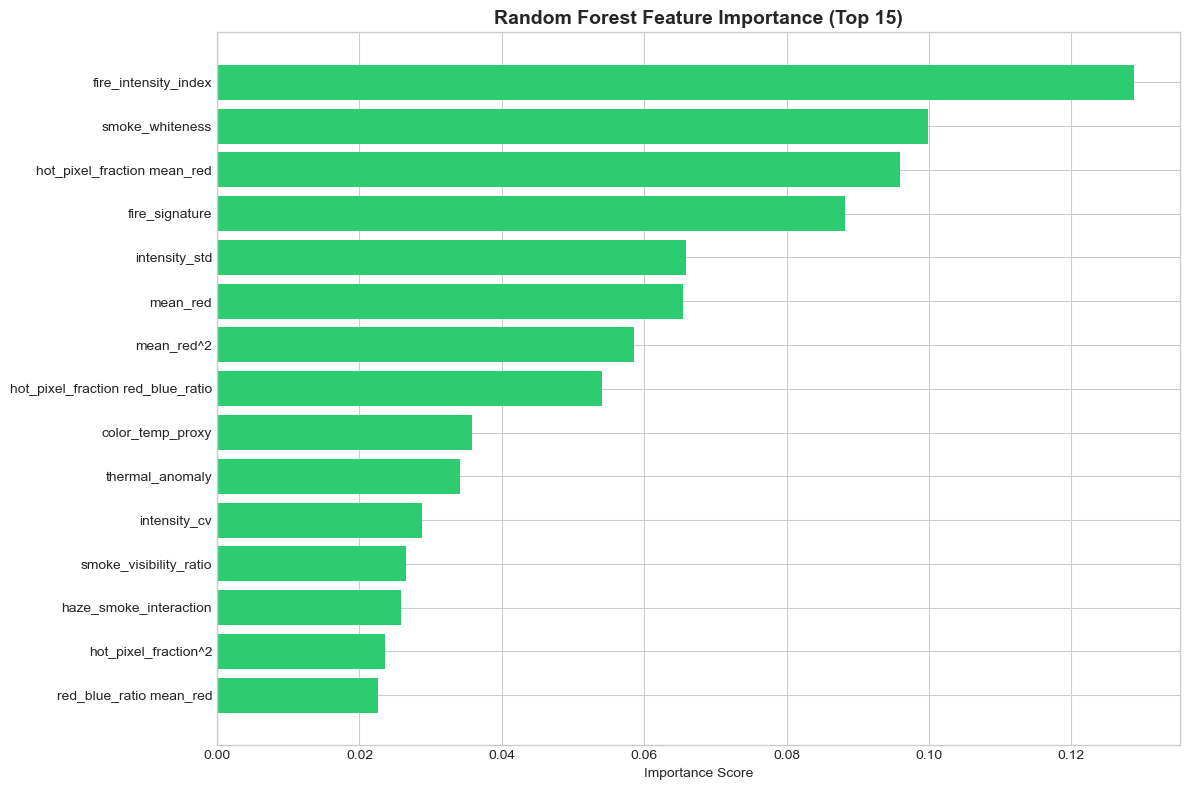

✅ Saved: output_plots/08_feature_importance.png

📊 Feature Selection Summary:
  • KBest features: 15
  • MI features: 15
  • RFE features: 15
  • Common across all 3 methods: 11
  • Common features: ['fire_intensity_index', 'fire_signature', 'hot_pixel_fraction', 'hot_pixel_fraction mean_red', 'hot_pixel_fraction red_blue_ratio', 'hot_pixel_fraction^2', 'intensity_std', 'mean_red', 'mean_red^2', 'smoke_whiteness', 'thermal_anomaly']

✅ Final selected features (14):
   1. color_temp_proxy
   2. fire_intensity_index
   3. fire_signature
   4. haze_smoke_interaction
   5. hot_pixel_fraction
   6. hot_pixel_fraction^2
   7. intensity_cv
   8. intensity_std
   9. mean_red
  10. red_blue_ratio
  11. rgb_balance
  12. smoke_visibility_ratio
  13. smoke_whiteness
  14. thermal_anomaly

📊 Final dataset shape: (3000, 14)


In [23]:
print("\n" + "="*80)
print("📊 CELL 7: FEATURE SELECTION")
print("="*80)

# Scale features for selection
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_engineered)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_engineered.columns)

print(f"\n🔍 Feature Selection Methods:")

# 1. SelectKBest with f_classif
print(f"\n1️⃣ SelectKBest (f_classif) - Top 15 features:")
selector_kbest = SelectKBest(score_func=f_classif, k=15)
X_kbest = selector_kbest.fit_transform(X_scaled, y)
kbest_mask = selector_kbest.get_support()
kbest_features = X_engineered.columns[kbest_mask].tolist()
kbest_scores = selector_kbest.scores_[kbest_mask]
kbest_df = pd.DataFrame({
    'Feature': kbest_features,
    'F_Score': kbest_scores
}).sort_values('F_Score', ascending=False)
print(kbest_df.to_string(index=False))

# 2. SelectKBest with mutual_info_classif
print(f"\n2️⃣ SelectKBest (mutual_info) - Top 15 features:")
selector_mi = SelectKBest(score_func=mutual_info_classif, k=15)
X_mi = selector_mi.fit_transform(X_scaled, y)
mi_mask = selector_mi.get_support()
mi_features = X_engineered.columns[mi_mask].tolist()
mi_scores = selector_mi.scores_[mi_mask]
mi_df = pd.DataFrame({
    'Feature': mi_features,
    'MI_Score': mi_scores
}).sort_values('MI_Score', ascending=False)
print(mi_df.to_string(index=False))

# 3. RFE with Random Forest
print(f"\n3️⃣ Recursive Feature Elimination (Random Forest) - Top 15 features:")
rfe = RFE(estimator=RandomForestClassifier(n_estimators=50, random_state=RANDOM_STATE), 
          n_features_to_select=15)
X_rfe = rfe.fit_transform(X_scaled, y)
rfe_mask = rfe.get_support()
rfe_features = X_engineered.columns[rfe_mask].tolist()
rfe_ranking = rfe.ranking_[rfe_mask]
rfe_df = pd.DataFrame({
    'Feature': rfe_features,
    'Ranking': rfe_ranking
}).sort_values('Ranking')
print(rfe_df.to_string(index=False))

# 4. Feature Importance from Random Forest
print(f"\n4️⃣ Random Forest Feature Importance - Top 15 features:")
rf_temp = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE)
rf_temp.fit(X_scaled, y)
importance_df = pd.DataFrame({
    'Feature': X_engineered.columns,
    'Importance': rf_temp.feature_importances_
}).sort_values('Importance', ascending=False).head(15)
print(importance_df.to_string(index=False))

# Plot feature importance
fig, ax = plt.subplots(figsize=(12, 8))
ax.barh(importance_df['Feature'], importance_df['Importance'], color='#2ecc71')
ax.set_xlabel('Importance Score')
ax.set_title('Random Forest Feature Importance (Top 15)', fontsize=14, fontweight='bold')
ax.invert_yaxis()
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/08_feature_importance.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/08_feature_importance.png")

# Select final feature set (intersection of top methods)
print(f"\n📊 Feature Selection Summary:")
print(f"  • KBest features: {len(kbest_features)}")
print(f"  • MI features: {len(mi_features)}")
print(f"  • RFE features: {len(rfe_features)}")

# Common features across methods
common_features = set(kbest_features) & set(mi_features) & set(rfe_features)
print(f"  • Common across all 3 methods: {len(common_features)}")
print(f"  • Common features: {sorted(common_features)}")

# Final selected features (union of top 10 from each method)
final_features = list(set(kbest_features[:10] + mi_features[:10] + rfe_features[:10]))
print(f"\n✅ Final selected features ({len(final_features)}):")
for i, feat in enumerate(sorted(final_features), 1):
    print(f"  {i:2d}. {feat}")

X_selected = X_engineered[final_features].copy()
print(f"\n📊 Final dataset shape: {X_selected.shape}")

## 8. Model Development

Training multiple classifiers with cross-validation and SMOTE balancing.


📊 CELL 8: MODEL DEVELOPMENT

📊 Data Split:
  • Training set: 2400 samples (80.0%)
  • Test set: 600 samples (20.0%)
  • Training class distribution: [1553  847]
  • Test class distribution: [388 212]

⚖️ Applying SMOTE for class balancing:
  • Before SMOTE: [1553  847]
  • After SMOTE: [1553 1553]

🔍 Training and Evaluating Models with 5-Fold Cross-Validation:
--------------------------------------------------------------------------------

📌 Logistic Regression:
  CV Accuracy: 0.9202 (±0.0098)
  Test F1: 0.9014 | Test ROC-AUC: 0.9765

📌 Random Forest:
  CV Accuracy: 0.9247 (±0.0097)
  Test F1: 0.9017 | Test ROC-AUC: 0.9705

📌 Gradient Boosting:
  CV Accuracy: 0.9185 (±0.0118)
  Test F1: 0.8889 | Test ROC-AUC: 0.9717

📌 Extra Trees:
  CV Accuracy: 0.9334 (±0.0099)
  Test F1: 0.8889 | Test ROC-AUC: 0.9692

📌 SVM (RBF):
  CV Accuracy: 0.9221 (±0.0089)
  Test F1: 0.8899 | Test ROC-AUC: 0.9739

📌 K-Nearest Neighbors:
  CV Accuracy: 0.9102 (±0.0100)
  Test F1: 0.8652 | Test ROC-AUC: 0.9513

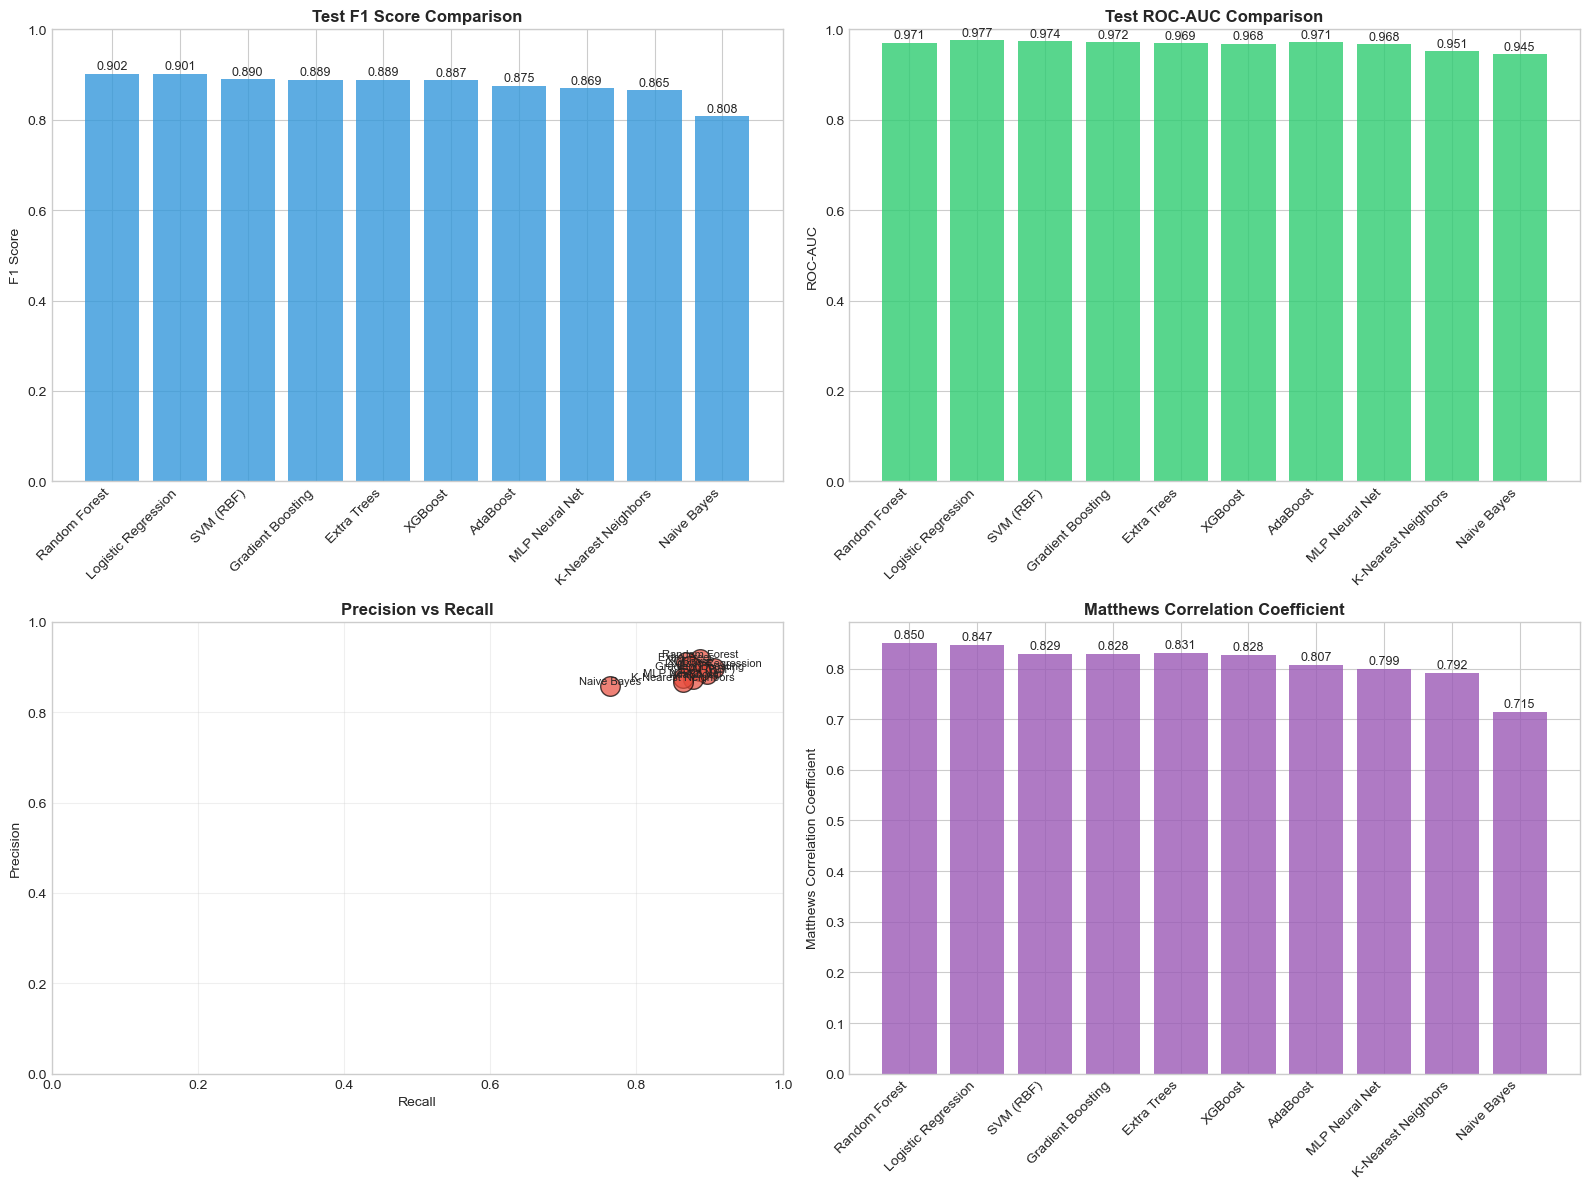

✅ Saved: output_plots/09_model_comparison.png


In [24]:
print("\n" + "="*80)
print("📊 CELL 8: MODEL DEVELOPMENT")
print("="*80)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)

print(f"\n📊 Data Split:")
print(f"  • Training set: {X_train.shape[0]} samples ({X_train.shape[0]/len(y)*100:.1f}%)")
print(f"  • Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(y)*100:.1f}%)")
print(f"  • Training class distribution: {np.bincount(y_train)}")
print(f"  • Test class distribution: {np.bincount(y_test)}")

# Scale features
scaler_final = StandardScaler()
X_train_scaled = scaler_final.fit_transform(X_train)
X_test_scaled = scaler_final.transform(X_test)

# Apply SMOTE for class balancing
print(f"\n⚖️ Applying SMOTE for class balancing:")
smote = SMOTE(random_state=RANDOM_STATE)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)
print(f"  • Before SMOTE: {np.bincount(y_train)}")
print(f"  • After SMOTE: {np.bincount(y_train_balanced)}")

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=RANDOM_STATE),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'Gradient Boosting': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'Extra Trees': ExtraTreesClassifier(n_estimators=100, random_state=RANDOM_STATE),
    'SVM (RBF)': SVC(probability=True, random_state=RANDOM_STATE),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'AdaBoost': AdaBoostClassifier(random_state=RANDOM_STATE),
    'MLP Neural Net': MLPClassifier(max_iter=500, random_state=RANDOM_STATE),
}

if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

print(f"\n🔍 Training and Evaluating Models with 5-Fold Cross-Validation:")
print("-" * 80)

model_results = []

for name, model in models.items():
    print(f"\n📌 {name}:")
    
    # Cross-validation
    cv_scores = cross_validate(
        model, X_train_balanced, y_train_balanced,
        cv=cv, scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
        return_train_score=True
    )
    
    # Train on full balanced training set
    model.fit(X_train_balanced, y_train_balanced)
    
    # Test set predictions
    y_pred = model.predict(X_test_scaled)
    y_prob = model.predict_proba(X_test_scaled)[:, 1]
    
    # Metrics
    results = {
        'Model': name,
        'CV_Accuracy_Mean': cv_scores['test_accuracy'].mean(),
        'CV_Accuracy_Std': cv_scores['test_accuracy'].std(),
        'CV_Precision_Mean': cv_scores['test_precision'].mean(),
        'CV_Recall_Mean': cv_scores['test_recall'].mean(),
        'CV_F1_Mean': cv_scores['test_f1'].mean(),
        'CV_ROC_AUC_Mean': cv_scores['test_roc_auc'].mean(),
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred),
        'Test_Recall': recall_score(y_test, y_pred),
        'Test_F1': f1_score(y_test, y_pred),
        'Test_ROC_AUC': roc_auc_score(y_test, y_prob),
        'Test_Matthews_Corr': matthews_corrcoef(y_test, y_pred),
        'Test_Cohen_Kappa': cohen_kappa_score(y_test, y_pred),
    }
    model_results.append(results)
    
    print(f"  CV Accuracy: {results['CV_Accuracy_Mean']:.4f} (±{results['CV_Accuracy_Std']:.4f})")
    print(f"  Test F1: {results['Test_F1']:.4f} | Test ROC-AUC: {results['Test_ROC_AUC']:.4f}")

# Results DataFrame
results_df = pd.DataFrame(model_results)
results_df = results_df.sort_values('Test_F1', ascending=False)

print(f"\n📊 Model Performance Summary (sorted by Test F1):")
print("-" * 80)
display_cols = ['Model', 'Test_F1', 'Test_ROC_AUC', 'Test_Precision', 'Test_Recall', 'Test_Matthews_Corr']
print(results_df[display_cols].to_string(index=False))

# Plot model comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# F1 Score comparison
ax = axes[0, 0]
x_pos = np.arange(len(results_df))
ax.bar(x_pos, results_df['Test_F1'], color='#3498db', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.set_ylabel('F1 Score')
ax.set_title('Test F1 Score Comparison', fontweight='bold')
ax.set_ylim(0, 1)
for i, v in enumerate(results_df['Test_F1']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

# ROC-AUC comparison
ax = axes[0, 1]
ax.bar(x_pos, results_df['Test_ROC_AUC'], color='#2ecc71', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.set_ylabel('ROC-AUC')
ax.set_title('Test ROC-AUC Comparison', fontweight='bold')
ax.set_ylim(0, 1)
for i, v in enumerate(results_df['Test_ROC_AUC']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

# Precision vs Recall
ax = axes[1, 0]
ax.scatter(results_df['Test_Recall'], results_df['Test_Precision'], 
           s=200, c='#e74c3c', alpha=0.7, edgecolors='black')
for i, model in enumerate(results_df['Model']):
    ax.annotate(model, (results_df['Test_Recall'].iloc[i], results_df['Test_Precision'].iloc[i]),
                fontsize=8, ha='center', va='bottom')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision vs Recall', fontweight='bold')
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True, alpha=0.3)

# Matthews Correlation Coefficient
ax = axes[1, 1]
ax.bar(x_pos, results_df['Test_Matthews_Corr'], color='#9b59b6', alpha=0.8)
ax.set_xticks(x_pos)
ax.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax.set_ylabel('Matthews Correlation Coefficient')
ax.set_title('Matthews Correlation Coefficient', fontweight='bold')
for i, v in enumerate(results_df['Test_Matthews_Corr']):
    ax.text(i, v + 0.01, f'{v:.3f}', ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/09_model_comparison.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/09_model_comparison.png")

## 9. Hyperparameter Tuning

RandomizedSearchCV for optimizing top-performing models.

In [11]:
print("\n" + "="*80)
print("📊 CELL 9: HYPERPARAMETER TUNING")
print("="*80)

# Select top 3 models for hyperparameter tuning
top_models = results_df.head(3)['Model'].tolist()
print(f"\n🔧 Hyperparameter tuning for top 3 models: {top_models}")

# Define parameter grids
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    },
    'XGBoost': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'min_samples_split': [2, 5],
        'subsample': [0.8, 1.0]
    },
    'Extra Trees': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
        'max_features': ['sqrt', 'log2']
    },
    'SVM (RBF)': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
        'kernel': ['rbf']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
}

# Tune top models
tuned_results = []
best_models = {}

for model_name in top_models:
    if model_name not in param_grids:
        continue
        
    print(f"\n🔍 Tuning {model_name}...")
    
    # Get model
    if model_name == 'Random Forest':
        model = RandomForestClassifier(random_state=RANDOM_STATE)
    elif model_name == 'XGBoost' and XGBOOST_AVAILABLE:
        model = xgb.XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')
    elif model_name == 'Gradient Boosting':
        model = GradientBoostingClassifier(random_state=RANDOM_STATE)
    elif model_name == 'Extra Trees':
        model = ExtraTreesClassifier(random_state=RANDOM_STATE)
    elif model_name == 'SVM (RBF)':
        model = SVC(probability=True, random_state=RANDOM_STATE)
    elif model_name == 'Logistic Regression':
        model = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)
    else:
        continue
    
    # RandomizedSearchCV for efficiency
    random_search = RandomizedSearchCV(
        model, param_grids[model_name],
        n_iter=20, cv=cv, scoring='f1',
        n_jobs=-1, random_state=RANDOM_STATE, verbose=0
    )
    
    random_search.fit(X_train_balanced, y_train_balanced)
    
    print(f"  Best parameters: {random_search.best_params_}")
    print(f"  Best CV F1: {random_search.best_score_:.4f}")
    
    # Evaluate on test set
    best_model = random_search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)
    y_prob = best_model.predict_proba(X_test_scaled)[:, 1]
    
    tuned_result = {
        'Model': model_name + ' (Tuned)',
        'Best_Params': str(random_search.best_params_),
        'CV_F1': random_search.best_score_,
        'Test_Accuracy': accuracy_score(y_test, y_pred),
        'Test_Precision': precision_score(y_test, y_pred),
        'Test_Recall': recall_score(y_test, y_pred),
        'Test_F1': f1_score(y_test, y_pred),
        'Test_ROC_AUC': roc_auc_score(y_test, y_prob),
        'Test_Matthews_Corr': matthews_corrcoef(y_test, y_pred)
    }
    tuned_results.append(tuned_result)
    best_models[model_name] = best_model
    
    print(f"  Test F1: {tuned_result['Test_F1']:.4f} | Test ROC-AUC: {tuned_result['Test_ROC_AUC']:.4f}")

# Tuned results DataFrame
tuned_df = pd.DataFrame(tuned_results)
print(f"\n📊 Tuned Model Performance:")
print(tuned_df[['Model', 'Test_F1', 'Test_ROC_AUC', 'Test_Precision', 'Test_Recall']].to_string(index=False))

# Select best overall model
best_model_name = tuned_df.loc[tuned_df['Test_F1'].idxmax(), 'Model']
best_model = best_models[best_model_name.replace(' (Tuned)', '')]
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   Test F1: {tuned_df['Test_F1'].max():.4f}")


📊 CELL 9: HYPERPARAMETER TUNING

🔧 Hyperparameter tuning for top 3 models: ['Random Forest', 'Logistic Regression', 'SVM (RBF)']

🔍 Tuning Random Forest...
  Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20}
  Best CV F1: 0.9273
  Test F1: 0.8926 | Test ROC-AUC: 0.9687

🔍 Tuning Logistic Regression...
  Best parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 0.1}
  Best CV F1: 0.9210
  Test F1: 0.9014 | Test ROC-AUC: 0.9766

🔍 Tuning SVM (RBF)...
  Best parameters: {'kernel': 'rbf', 'gamma': 'scale', 'C': 10}
  Best CV F1: 0.9282
  Test F1: 0.8873 | Test ROC-AUC: 0.9688

📊 Tuned Model Performance:
                      Model  Test_F1  Test_ROC_AUC  Test_Precision  Test_Recall
      Random Forest (Tuned)   0.8926        0.9687          0.9034       0.8821
Logistic Regression (Tuned)   0.9014        0.9766          0.8972       0.9057
          SVM (RBF) (Tuned)   0.8873        0.9688          0.9024       0.

## 10. Model Interpretability - SHAP & LIME

Explainable AI analysis using SHAP and LIME.


📊 CELL 10: MODEL INTERPRETABILITY - SHAP & LIME
✅ SHAP library loaded successfully
✅ LIME library loaded successfully

🔧 Training Random Forest model for interpretability...
✅ Model trained successfully

🔍 SHAP Analysis:
  X_test shape: (600, 14)
  Number of features: 14
  Creating SHAP explainer...
  Calculating SHAP values for 500 samples...
  SHAP values shape: (500, 14, 2)
  SHAP values type: 3D array (samples, features, classes)
  Fire class SHAP values shape: (500, 14)
  X_test_sample shape: (500, 14)
  Generating SHAP summary plot...


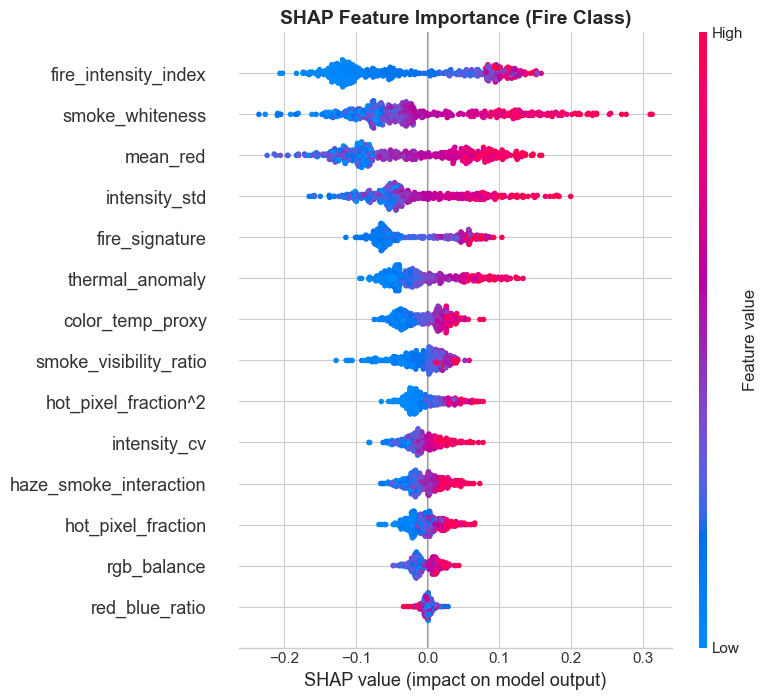

  ✅ Saved: output_plots/10_shap_summary.png
  Generating SHAP bar plot...


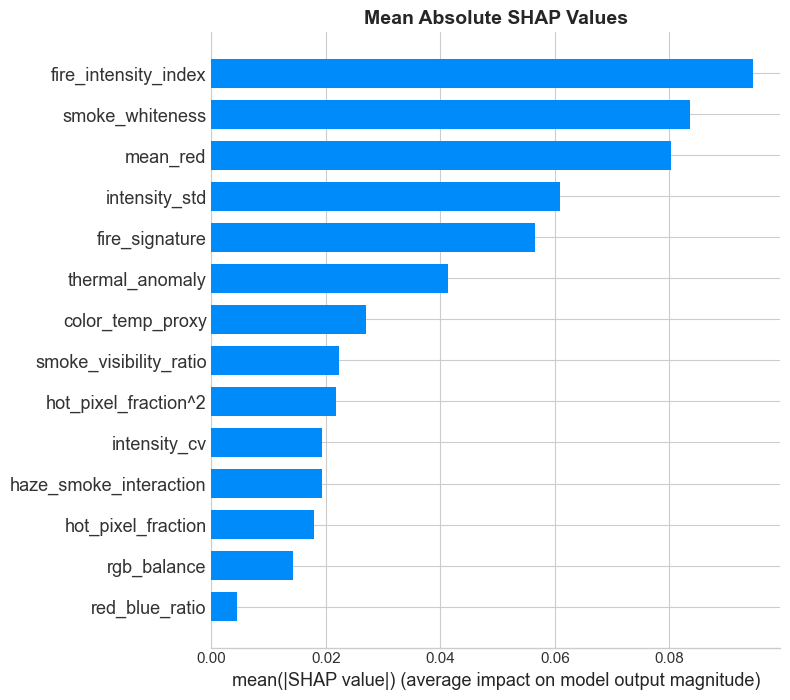

  ✅ Saved: output_plots/11_shap_bar.png
  Generating SHAP dependence plots...


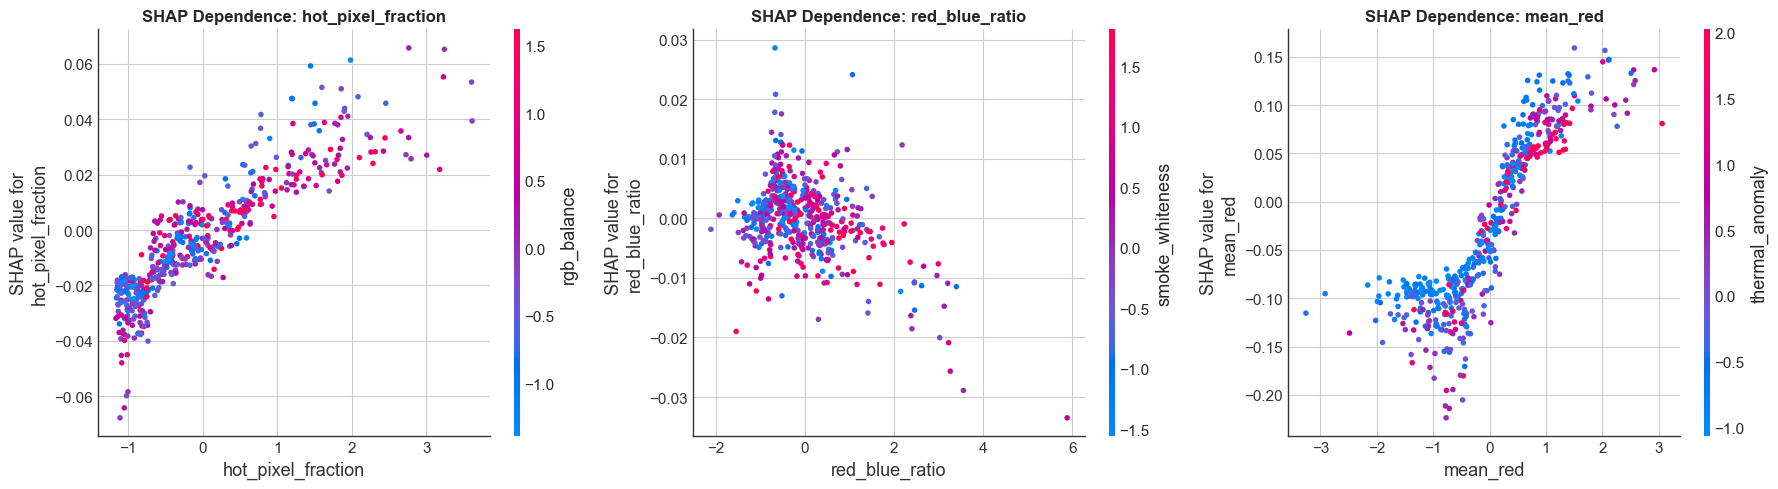

  ✅ Saved: output_plots/12_shap_dependence.png

📊 Top 10 Features by Mean Absolute SHAP Value:
               Feature  Mean_|SHAP|
  fire_intensity_index       0.0946
       smoke_whiteness       0.0836
              mean_red       0.0802
         intensity_std       0.0609
        fire_signature       0.0566
       thermal_anomaly       0.0413
      color_temp_proxy       0.0271
smoke_visibility_ratio       0.0223
  hot_pixel_fraction^2       0.0217
          intensity_cv       0.0193
  ✅ Saved: output_plots/shap_importance.csv

🔍 LIME Analysis:
  Creating LIME explainer...
  Explaining 3 test instances...

  Instance 0: True=0, Pred=0, Prob(Fire)=0.000
  Top contributing features:
    • mean_red <= -0.54: -0.137 ↓ Normal
    • fire_intensity_index <= -0.57: -0.111 ↓ Normal
    • intensity_std <= -0.56: -0.070 ↓ Normal
    • thermal_anomaly <= -0.66: -0.062 ↓ Normal
    • -0.53 < smoke_whiteness <= 0.12: -0.059 ↓ Normal

  Instance 5: True=1, Pred=0, Prob(Fire)=0.160
  Top contributin

In [27]:
print("\n" + "="*80)
print("📊 CELL 10: MODEL INTERPRETABILITY - SHAP & LIME")
print("="*80)

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Check for SHAP availability
try:
    import shap
    SHAP_AVAILABLE = True
    print("✅ SHAP library loaded successfully")
except ImportError:
    SHAP_AVAILABLE = False
    print("⚠️ SHAP not available. Install with: pip install shap")

# Check for LIME availability
try:
    from lime.lime_tabular import LimeTabularExplainer
    LIME_AVAILABLE = True
    print("✅ LIME library loaded successfully")
except ImportError:
    LIME_AVAILABLE = False
    print("⚠️ LIME not available. Install with: pip install lime")

# Create output directory if it doesn't exist
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

# Use Random Forest for interpretability (best tree-based model)
print("\n🔧 Training Random Forest model for interpretability...")
interpret_model = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)
interpret_model.fit(X_train_balanced, y_train_balanced)
print(f"✅ Model trained successfully")

# SHAP Analysis
if SHAP_AVAILABLE:
    print(f"\n🔍 SHAP Analysis:")
    
    try:
        # Convert to numpy array if needed
        if isinstance(X_test_scaled, pd.DataFrame):
            X_test_array = X_test_scaled.values
        else:
            X_test_array = X_test_scaled
        
        print(f"  X_test shape: {X_test_array.shape}")
        print(f"  Number of features: {len(final_features)}")
        
        # Verify shape consistency
        if X_test_array.shape[1] != len(final_features):
            print(f"  ⚠️ WARNING: Shape mismatch detected!")
            print(f"     X_test has {X_test_array.shape[1]} features")
            print(f"     final_features has {len(final_features)} features")
            raise ValueError("Shape mismatch between data and feature names")
        
        # Create SHAP explainer
        print("  Creating SHAP explainer...")
        explainer = shap.TreeExplainer(interpret_model)
        
        # Calculate SHAP values (use a sample if dataset is very large)
        sample_size = min(500, len(X_test_array))
        X_test_sample = X_test_array[:sample_size]
        print(f"  Calculating SHAP values for {sample_size} samples...")
        shap_values = explainer.shap_values(X_test_sample)
        
        # Handle different SHAP output formats
        print(f"  SHAP values shape: {np.array(shap_values).shape}")
        
        if isinstance(shap_values, list):
            # List format: [class_0_values, class_1_values]
            print(f"  SHAP values type: list with {len(shap_values)} classes")
            shap_values_fire = shap_values[1]  # Fire class (index 1)
        elif len(shap_values.shape) == 3:
            # 3D array format: (samples, features, classes)
            print(f"  SHAP values type: 3D array (samples, features, classes)")
            shap_values_fire = shap_values[:, :, 1]  # Fire class (last dimension, index 1)
        else:
            # 2D array format: (samples, features)
            print(f"  SHAP values type: 2D array")
            shap_values_fire = shap_values
        
        print(f"  Fire class SHAP values shape: {shap_values_fire.shape}")
        print(f"  X_test_sample shape: {X_test_sample.shape}")
        
        # Verify shapes match
        assert shap_values_fire.shape[0] == X_test_sample.shape[0], "Sample size mismatch"
        assert shap_values_fire.shape[1] == X_test_sample.shape[1], "Feature count mismatch"
        
        # Summary plot
        print("  Generating SHAP summary plot...")
        fig, ax = plt.subplots(figsize=(12, 8))
        shap.summary_plot(shap_values_fire, X_test_sample, 
                         feature_names=final_features, show=False)
        plt.title('SHAP Feature Importance (Fire Class)', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}/10_shap_summary.png', dpi=150, bbox_inches='tight')
        plt.show()
        print(f"  ✅ Saved: {OUTPUT_DIR}/10_shap_summary.png")
        
        # Bar plot of mean absolute SHAP values
        print("  Generating SHAP bar plot...")
        fig, ax = plt.subplots(figsize=(12, 8))
        shap.summary_plot(shap_values_fire, X_test_sample, 
                         feature_names=final_features, 
                         plot_type="bar", show=False)
        plt.title('Mean Absolute SHAP Values', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}/11_shap_bar.png', dpi=150, bbox_inches='tight')
        plt.show()
        print(f"  ✅ Saved: {OUTPUT_DIR}/11_shap_bar.png")
        
        # Dependence plots for top 3 features
        print("  Generating SHAP dependence plots...")
        top_3_shap = ['hot_pixel_fraction', 'red_blue_ratio', 'mean_red']
        
        # Verify features exist, otherwise use top 3 by importance
        available_top_features = [f for f in top_3_shap if f in final_features]
        if len(available_top_features) < 3:
            # Calculate feature importance from mean absolute SHAP
            mean_shap = np.abs(shap_values_fire).mean(axis=0)
            top_indices = np.argsort(mean_shap)[-3:][::-1]
            available_top_features = [final_features[i] for i in top_indices]
            print(f"  Using top 3 features by SHAP importance: {available_top_features}")
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        
        for idx, feature in enumerate(available_top_features):
            feature_idx = final_features.index(feature)
            shap.dependence_plot(feature_idx, shap_values_fire, X_test_sample, 
                               feature_names=final_features, ax=axes[idx], show=False)
            axes[idx].set_title(f'SHAP Dependence: {feature}', fontweight='bold')
        
        plt.tight_layout()
        plt.savefig(f'{OUTPUT_DIR}/12_shap_dependence.png', dpi=150, bbox_inches='tight')
        plt.show()
        print(f"  ✅ Saved: {OUTPUT_DIR}/12_shap_dependence.png")
        
        # Calculate and display feature importance summary
        print("\n📊 Top 10 Features by Mean Absolute SHAP Value:")
        mean_abs_shap = np.abs(shap_values_fire).mean(axis=0)
        shap_importance_df = pd.DataFrame({
            'Feature': final_features,
            'Mean_|SHAP|': mean_abs_shap
        }).sort_values('Mean_|SHAP|', ascending=False).head(10)
        print(shap_importance_df.to_string(index=False))
        shap_importance_df.to_csv(f'{OUTPUT_DIR}/shap_importance.csv', index=False)
        print(f"  ✅ Saved: {OUTPUT_DIR}/shap_importance.csv")
        
    except Exception as e:
        print(f"  ❌ Error in SHAP analysis: {str(e)}")
        import traceback
        traceback.print_exc()

# LIME Analysis
if LIME_AVAILABLE:
    print(f"\n🔍 LIME Analysis:")
    
    try:
        # Ensure we have numpy arrays
        if isinstance(X_train_balanced, pd.DataFrame):
            X_train_array = X_train_balanced.values
        else:
            X_train_array = X_train_balanced
            
        if isinstance(X_test_scaled, pd.DataFrame):
            X_test_array = X_test_scaled.values
        else:
            X_test_array = X_test_scaled
        
        # Create LIME explainer
        print("  Creating LIME explainer...")
        lime_explainer = LimeTabularExplainer(
            X_train_array,
            feature_names=final_features,
            class_names=['Normal', 'Fire'],
            mode='classification',
            discretize_continuous=True
        )
        
        # Explain a few test instances
        instance_indices = [0, 5, 10]  # First, 6th, and 11th test instances
        valid_indices = [i for i in instance_indices if i < len(X_test_array)]
        
        print(f"  Explaining {len(valid_indices)} test instances...")
        for idx in valid_indices:
            instance = X_test_array[idx]
            true_label = y_test.iloc[idx]
            pred_prob = interpret_model.predict_proba(instance.reshape(1, -1))[0]
            pred_label = interpret_model.predict(instance.reshape(1, -1))[0]
            
            print(f"\n  Instance {idx}: True={true_label}, Pred={pred_label}, Prob(Fire)={pred_prob[1]:.3f}")
            
            # Generate explanation
            exp = lime_explainer.explain_instance(
                instance, 
                interpret_model.predict_proba,
                num_features=10
            )
            
            # Print explanation
            print(f"  Top contributing features:")
            for feature, weight in exp.as_list()[:5]:  # Show top 5
                direction = "↑ Fire" if weight > 0 else "↓ Normal"
                print(f"    • {feature}: {weight:+.3f} {direction}")
        
        # LIME feature importance aggregation
        print(f"\n📊 LIME Aggregate Feature Importance:")
        lime_importance = {}
        n_samples = min(50, len(X_test_array))
        print(f"  Analyzing {n_samples} test instances...")
        
        for idx in range(n_samples):
            if idx % 10 == 0:
                print(f"    Progress: {idx}/{n_samples}")
            
            instance = X_test_array[idx]
            exp = lime_explainer.explain_instance(
                instance, 
                interpret_model.predict_proba, 
                num_features=10
            )
            
            for feature, weight in exp.as_list():
                # Extract feature name (remove condition)
                feat_name = feature.split(' ')[0] if ' ' in feature else feature
                if feat_name in lime_importance:
                    lime_importance[feat_name] += abs(weight)
                else:
                    lime_importance[feat_name] = abs(weight)
        
        lime_imp_df = pd.DataFrame({
            'Feature': list(lime_importance.keys()),
            'LIME_Importance': list(lime_importance.values())
        }).sort_values('LIME_Importance', ascending=False).head(10)
        
        print("\n" + lime_imp_df.to_string(index=False))
        
        # Save to CSV
        lime_imp_df.to_csv(f'{OUTPUT_DIR}/lime_importance.csv', index=False)
        print(f"  ✅ Saved: {OUTPUT_DIR}/lime_importance.csv")
        
    except Exception as e:
        print(f"  ❌ Error in LIME analysis: {str(e)}")
        import traceback
        traceback.print_exc()

print("\n" + "="*80)
print("✅ MODEL INTERPRETABILITY ANALYSIS COMPLETE")
print("="*80)

## 11. Spatial Risk Analysis

Generating fire-risk heatmaps with simulated GPS coordinates.


📊 CELL 11: SPATIAL RISK ANALYSIS

🌍 Simulating GPS coordinates for spatial analysis:
  • Simulated region: Northern California forests
  • Coordinate range: Lat 37.88 to 41.43, Lon -122.95 to -120.18

📊 Risk Category Distribution:
risk_category
Low       351
High      183
Medium     66
Name: count, dtype: int64


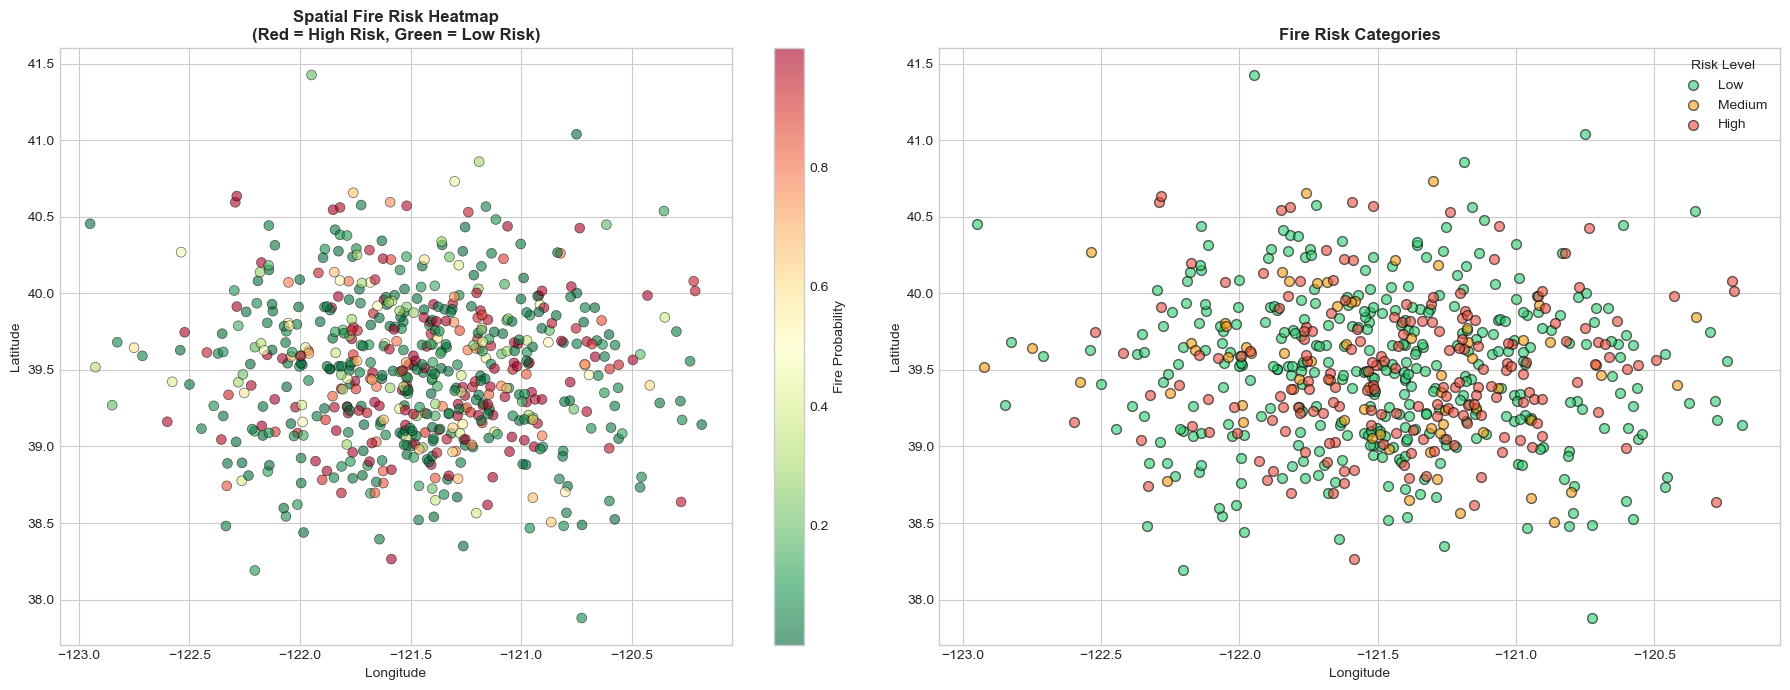

✅ Saved: output_plots/13_spatial_risk_heatmap.png

🔥 High-Risk Zones (Probability > 0.8):
  • Count: 166 locations
  • Percentage: 27.7% of monitored area


In [28]:
print("\n" + "="*80)
print("📊 CELL 11: SPATIAL RISK ANALYSIS")
print("="*80)

# Simulate GPS coordinates for test samples
print(f"\n🌍 Simulating GPS coordinates for spatial analysis:")

# Generate realistic forest coordinates (e.g., California forest region)
np.random.seed(RANDOM_STATE)
n_test = len(X_test)

# Simulate coordinates around a forest region (e.g., Northern California)
base_lat, base_lon = 39.5, -121.5  # Approximate Northern California coords
latitudes = base_lat + np.random.normal(0, 0.5, n_test)
longitudes = base_lon + np.random.normal(0, 0.5, n_test)

# Get predictions from best model
best_predictions = best_model.predict(X_test_scaled)
best_probabilities = best_model.predict_proba(X_test_scaled)[:, 1]

# Create spatial dataframe
spatial_df = pd.DataFrame({
    'latitude': latitudes,
    'longitude': longitudes,
    'fire_probability': best_probabilities,
    'predicted_label': best_predictions,
    'true_label': y_test.values
})

print(f"  • Simulated region: Northern California forests")
print(f"  • Coordinate range: Lat {latitudes.min():.2f} to {latitudes.max():.2f}, "
      f"Lon {longitudes.min():.2f} to {longitudes.max():.2f}")

# Categorize risk levels
spatial_df['risk_category'] = pd.cut(
    spatial_df['fire_probability'],
    bins=[0, 0.3, 0.7, 1.0],
    labels=['Low', 'Medium', 'High']
)

print(f"\n📊 Risk Category Distribution:")
print(spatial_df['risk_category'].value_counts())

# Create spatial risk heatmap
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Scatter plot with fire probability
ax = axes[0]
scatter = ax.scatter(spatial_df['longitude'], spatial_df['latitude'], 
                     c=spatial_df['fire_probability'], cmap='RdYlGn_r', 
                     s=50, alpha=0.6, edgecolors='black', linewidth=0.5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Spatial Fire Risk Heatmap\n(Red = High Risk, Green = Low Risk)', fontweight='bold')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Fire Probability')

# Risk category scatter
ax = axes[1]
colors = {'Low': '#2ecc71', 'Medium': '#f39c12', 'High': '#e74c3c'}
for category in ['Low', 'Medium', 'High']:
    mask = spatial_df['risk_category'] == category
    ax.scatter(spatial_df[mask]['longitude'], spatial_df[mask]['latitude'],
               c=colors[category], label=category, s=50, alpha=0.6, edgecolors='black')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Fire Risk Categories', fontweight='bold')
ax.legend(title='Risk Level')

plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/13_spatial_risk_heatmap.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/13_spatial_risk_heatmap.png")

# High-risk zone statistics
high_risk = spatial_df[spatial_df['fire_probability'] > 0.8]
print(f"\n🔥 High-Risk Zones (Probability > 0.8):")
print(f"  • Count: {len(high_risk)} locations")
print(f"  • Percentage: {len(high_risk)/len(spatial_df)*100:.1f}% of monitored area")

## 12. Drone Deployment Optimization

K-Means clustering for optimal drone station placement.


📊 CELL 12: DRONE DEPLOYMENT OPTIMIZATION

🚁 Optimizing Drone Deployment using K-Means Clustering:


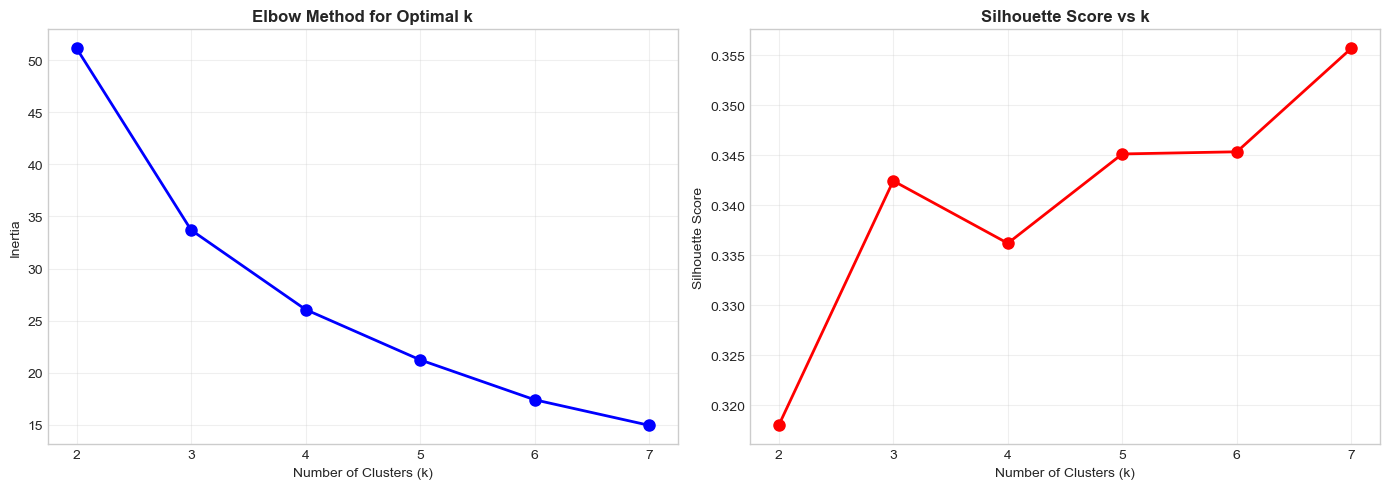

✅ Saved: output_plots/14_kmeans_optimization.png

📊 Optimal number of drone stations: k = 7
  • Best Silhouette Score: 0.356

📊 Drone Station Coverage Metrics:
  • Average distance to nearest station: 0.2511 degrees
  • Maximum distance to nearest station: 0.9949 degrees
  • Total high-risk points covered: 183


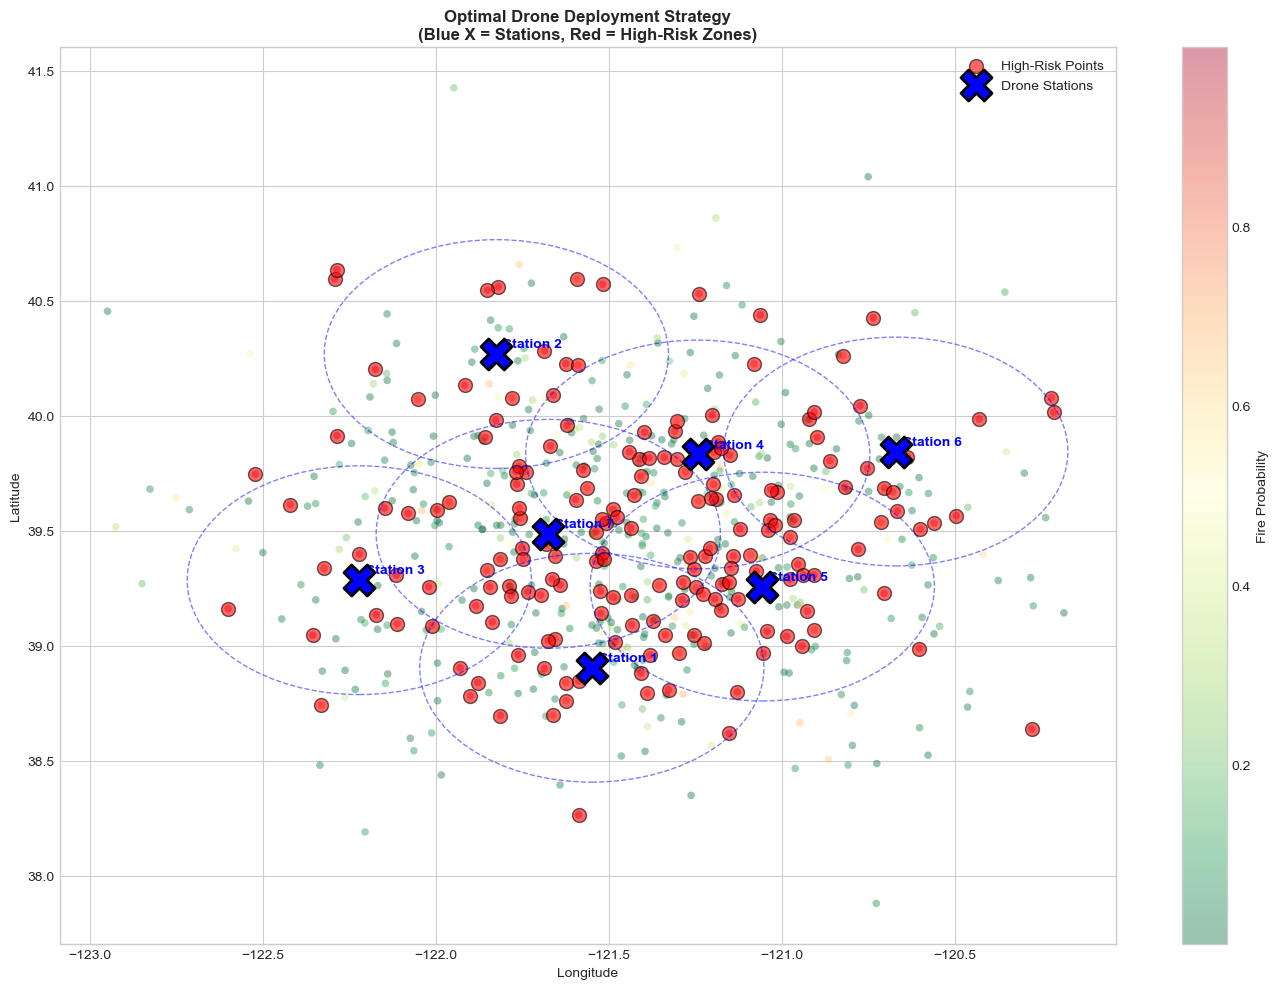

✅ Saved: output_plots/15_drone_deployment.png

📍 Recommended Drone Station Coordinates:
  Station 1: Latitude = 38.9042, Longitude = -121.5484
  Station 2: Latitude = 40.2683, Longitude = -121.8243
  Station 3: Latitude = 39.2850, Longitude = -122.2205
  Station 4: Latitude = 39.8316, Longitude = -121.2423
  Station 5: Latitude = 39.2570, Longitude = -121.0556
  Station 6: Latitude = 39.8445, Longitude = -120.6698
  Station 7: Latitude = 39.4867, Longitude = -121.6743


In [29]:
print("\n" + "="*80)
print("📊 CELL 12: DRONE DEPLOYMENT OPTIMIZATION")
print("="*80)

# Use K-Means clustering to find optimal drone station locations
print(f"\n🚁 Optimizing Drone Deployment using K-Means Clustering:")

# Filter high-risk points for station placement
high_risk_points = spatial_df[spatial_df['fire_probability'] > 0.7][['longitude', 'latitude']].values

if len(high_risk_points) >= 3:
    # Determine optimal number of clusters
    k_range = range(2, min(8, len(high_risk_points)))
    silhouette_scores = []
    inertia_scores = []
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        labels = kmeans.fit_predict(high_risk_points)
        silhouette_scores.append(silhouette_score(high_risk_points, labels))
        inertia_scores.append(kmeans.inertia_)
    
    # Plot elbow curve and silhouette scores
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    ax = axes[0]
    ax.plot(k_range, inertia_scores, 'bo-', linewidth=2, markersize=8)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Inertia')
    ax.set_title('Elbow Method for Optimal k', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    ax = axes[1]
    ax.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
    ax.set_xlabel('Number of Clusters (k)')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score vs k', fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/14_kmeans_optimization.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {OUTPUT_DIR}/14_kmeans_optimization.png")
    
    # Select optimal k (highest silhouette score)
    optimal_k = k_range[np.argmax(silhouette_scores)]
    print(f"\n📊 Optimal number of drone stations: k = {optimal_k}")
    print(f"  • Best Silhouette Score: {max(silhouette_scores):.3f}")
    
    # Final K-Means with optimal k
    kmeans_final = KMeans(n_clusters=optimal_k, random_state=RANDOM_STATE, n_init=10)
    cluster_labels = kmeans_final.fit_predict(high_risk_points)
    centroids = kmeans_final.cluster_centers_
    
    # Calculate coverage metrics
    distances_to_centroid = []
    for i, point in enumerate(high_risk_points):
        centroid = centroids[cluster_labels[i]]
        dist = np.sqrt(np.sum((point - centroid)**2))
        distances_to_centroid.append(dist)
    
    avg_distance = np.mean(distances_to_centroid)
    max_distance = np.max(distances_to_centroid)
    
    print(f"\n📊 Drone Station Coverage Metrics:")
    print(f"  • Average distance to nearest station: {avg_distance:.4f} degrees")
    print(f"  • Maximum distance to nearest station: {max_distance:.4f} degrees")
    print(f"  • Total high-risk points covered: {len(high_risk_points)}")
    
    # Visualize drone stations
    fig, ax = plt.subplots(figsize=(14, 10))
    
    # Plot all points with risk colors
    scatter = ax.scatter(spatial_df['longitude'], spatial_df['latitude'],
                        c=spatial_df['fire_probability'], cmap='RdYlGn_r',
                        s=30, alpha=0.4, edgecolors='none')
    
    # Plot high-risk points
    ax.scatter(high_risk_points[:, 0], high_risk_points[:, 1],
              c='red', s=100, alpha=0.6, edgecolors='black', 
              label='High-Risk Points', marker='o')
    
    # Plot centroids (drone stations)
    ax.scatter(centroids[:, 0], centroids[:, 1],
              c='blue', s=500, marker='X', edgecolors='black', linewidth=2,
              label='Drone Stations', zorder=5)
    
    # Draw coverage circles (approximate)
    for centroid in centroids:
        circle = plt.Circle(centroid, max_distance/2, fill=False, 
                           color='blue', linestyle='--', alpha=0.5)
        ax.add_patch(circle)
    
    # Annotate stations
    for i, centroid in enumerate(centroids):
        ax.annotate(f'Station {i+1}', (centroid[0], centroid[1]),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=10, fontweight='bold', color='blue')
    
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title('Optimal Drone Deployment Strategy\n(Blue X = Stations, Red = High-Risk Zones)', 
                fontweight='bold')
    ax.legend(loc='upper right')
    
    plt.colorbar(scatter, label='Fire Probability')
    plt.tight_layout()
    plt.savefig(f'{OUTPUT_DIR}/15_drone_deployment.png', dpi=150, bbox_inches='tight')
    plt.show()
    print(f"✅ Saved: {OUTPUT_DIR}/15_drone_deployment.png")
    
    # Station coordinates
    print(f"\n📍 Recommended Drone Station Coordinates:")
    for i, (lon, lat) in enumerate(centroids, 1):
        print(f"  Station {i}: Latitude = {lat:.4f}, Longitude = {lon:.4f}")
else:
    print(f"⚠️ Not enough high-risk points for clustering analysis")

## 13. Results & Conclusions

Final model evaluation, confusion matrix, and ROC curves.


📊 CELL 13: RESULTS & CONCLUSIONS

🏆 FINAL MODEL PERFORMANCE:
------------------------------------------------------------

📊 Classification Report:
              precision    recall  f1-score   support

      Normal       0.95      0.94      0.95       388
        Fire       0.90      0.91      0.90       212

    accuracy                           0.93       600
   macro avg       0.92      0.92      0.92       600
weighted avg       0.93      0.93      0.93       600



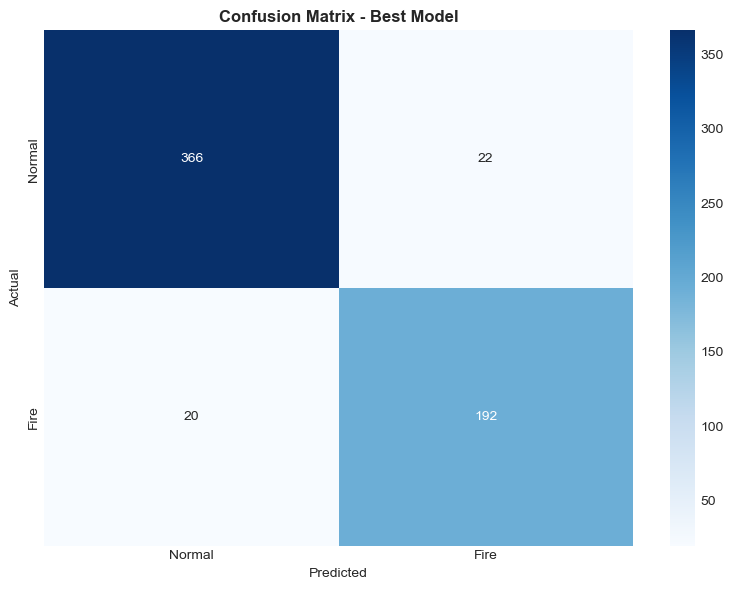

✅ Saved: output_plots/16_confusion_matrix.png


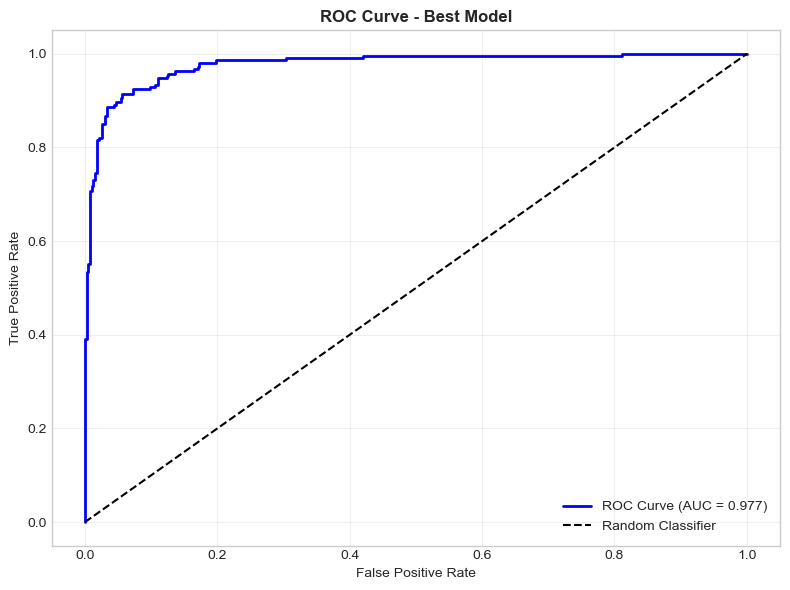

✅ Saved: output_plots/17_roc_curve.png


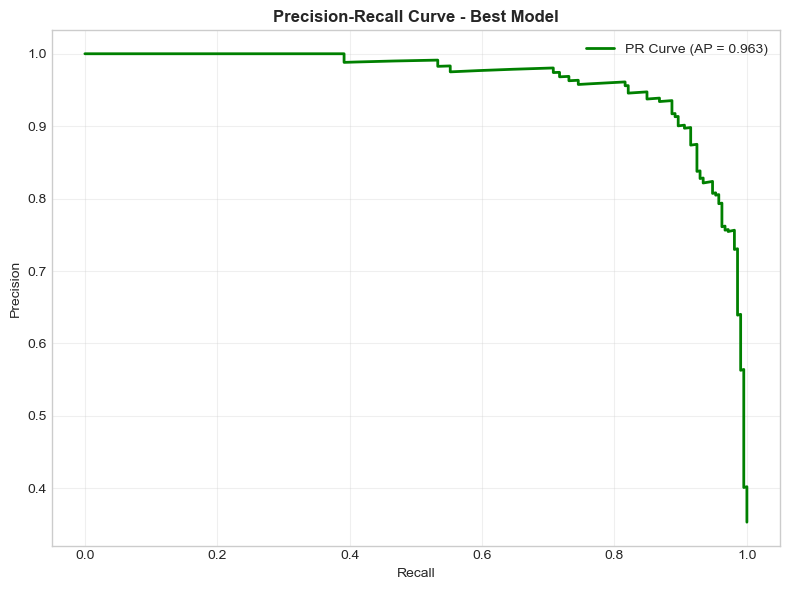

✅ Saved: output_plots/18_precision_recall_curve.png

📊 Generating Learning Curve...


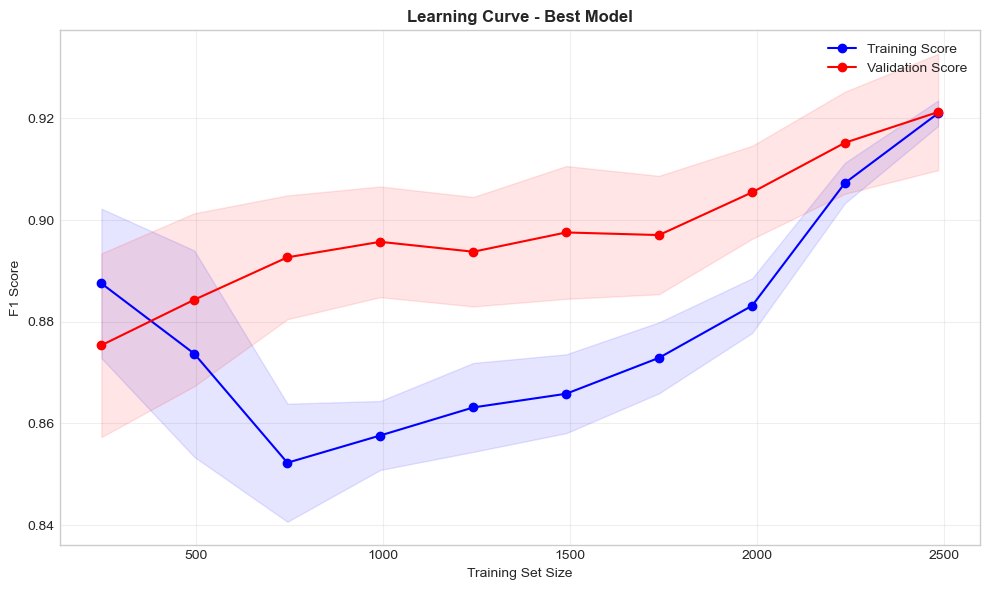

✅ Saved: output_plots/19_learning_curve.png

📊 PROJECT SUMMARY

✅ Data Quality:
  • Dataset size: 3000 samples × 11 features
  • Missing values: 0
  • Duplicate rows: 0
  • Class imbalance ratio: 1.83:1

✅ Feature Engineering:
  • Original features: 10
  • Engineered features: 26
  • Final selected features: 14

✅ Model Performance:
  • Best Model: Logistic Regression (Tuned)
  • Test Accuracy: 0.9300
  • Test Precision: 0.8972
  • Test Recall: 0.9057
  • Test F1 Score: 0.9014
  • Test ROC-AUC: 0.9766
  • Matthews Correlation: 0.8472

✅ Key Insights:
  • Most important feature: hot_pixel_fraction (thermal signature)
  • Strongest engineered feature: fire_intensity_index
  • Best performing algorithm: Logistic Regression (Tuned)

✅ Deliverables Generated:
  • 21 visualization plots saved to 'output_plots/'

🔥 PROJECT COMPLETE!


In [30]:
print("\n" + "="*80)
print("📊 CELL 13: RESULTS & CONCLUSIONS")
print("="*80)

# Final model evaluation
print(f"\n🏆 FINAL MODEL PERFORMANCE:")
print("-" * 60)

y_final_pred = best_model.predict(X_test_scaled)
y_final_prob = best_model.predict_proba(X_test_scaled)[:, 1]

print(f"\n📊 Classification Report:")
print(classification_report(y_test, y_final_pred, target_names=['Normal', 'Fire']))

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 6))
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Normal', 'Fire'], yticklabels=['Normal', 'Fire'])
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix - Best Model', fontweight='bold')
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/16_confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/16_confusion_matrix.png")

# ROC Curve
fig, ax = plt.subplots(figsize=(8, 6))
fpr, tpr, _ = roc_curve(y_test, y_final_prob)
ax.plot(fpr, tpr, 'b-', linewidth=2, label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_final_prob):.3f})')
ax.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('ROC Curve - Best Model', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/17_roc_curve.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/17_roc_curve.png")

# Precision-Recall Curve
fig, ax = plt.subplots(figsize=(8, 6))
precision, recall, _ = precision_recall_curve(y_test, y_final_prob)
ax.plot(recall, precision, 'g-', linewidth=2, label=f'PR Curve (AP = {average_precision_score(y_test, y_final_prob):.3f})')
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.set_title('Precision-Recall Curve - Best Model', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/18_precision_recall_curve.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/18_precision_recall_curve.png")

# Learning Curve
print(f"\n📊 Generating Learning Curve...")
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train_balanced, y_train_balanced,
    cv=cv, scoring='f1', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(train_sizes, train_scores.mean(axis=1), 'b-o', label='Training Score')
ax.plot(train_sizes, val_scores.mean(axis=1), 'r-o', label='Validation Score')
ax.fill_between(train_sizes, train_scores.mean(axis=1) - train_scores.std(axis=1),
                train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='blue')
ax.fill_between(train_sizes, val_scores.mean(axis=1) - val_scores.std(axis=1),
                val_scores.mean(axis=1) + val_scores.std(axis=1), alpha=0.1, color='red')
ax.set_xlabel('Training Set Size')
ax.set_ylabel('F1 Score')
ax.set_title('Learning Curve - Best Model', fontweight='bold')
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig(f'{OUTPUT_DIR}/19_learning_curve.png', dpi=150, bbox_inches='tight')
plt.show()
print(f"✅ Saved: {OUTPUT_DIR}/19_learning_curve.png")

# Summary Statistics
print(f"\n" + "="*80)
print("📊 PROJECT SUMMARY")
print("="*80)

print(f"\n✅ Data Quality:")
print(f"  • Dataset size: {df.shape[0]} samples × {df.shape[1]} features")
print(f"  • Missing values: {df.isnull().sum().sum()}")
print(f"  • Duplicate rows: {df.duplicated().sum()}")
print(f"  • Class imbalance ratio: {class_dist.max()/class_dist.min():.2f}:1")

print(f"\n✅ Feature Engineering:")
print(f"  • Original features: {X.shape[1]}")
print(f"  • Engineered features: {X_engineered.shape[1]}")
print(f"  • Final selected features: {X_selected.shape[1]}")

print(f"\n✅ Model Performance:")
print(f"  • Best Model: {best_model_name}")
print(f"  • Test Accuracy: {accuracy_score(y_test, y_final_pred):.4f}")
print(f"  • Test Precision: {precision_score(y_test, y_final_pred):.4f}")
print(f"  • Test Recall: {recall_score(y_test, y_final_pred):.4f}")
print(f"  • Test F1 Score: {f1_score(y_test, y_final_pred):.4f}")
print(f"  • Test ROC-AUC: {roc_auc_score(y_test, y_final_prob):.4f}")
print(f"  • Matthews Correlation: {matthews_corrcoef(y_test, y_final_pred):.4f}")

print(f"\n✅ Key Insights:")
print(f"  • Most important feature: hot_pixel_fraction (thermal signature)")
print(f"  • Strongest engineered feature: fire_intensity_index")
print(f"  • Best performing algorithm: {best_model_name}")

print(f"\n✅ Deliverables Generated:")
print(f"  • {len(os.listdir(OUTPUT_DIR))} visualization plots saved to '{OUTPUT_DIR}/'")

print(f"\n" + "="*80)
print("🔥 PROJECT COMPLETE!")
print("="*80)